<a href="https://colab.research.google.com/github/gamagilang/KPMG_Virtual_Internship/blob/master/KPMG_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/gamagilang/KPMG_Virtual_Internship.git

Cloning into 'KPMG_Virtual_Internship'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 22 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (22/22), done.


In [ ]:
S = 'Hello'

In [ ]:
S = S.replace(S[0],"")
S

'ello'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Import Excel File**

In [ ]:
xl = pd.ExcelFile('/content/KPMG_Virtual_Internship/KPMG_VI_New_raw_data_update_final.xlsx')

In [ ]:
xl.sheet_names

['Title Sheet',
 'Transactions',
 'NewCustomerList',
 'CustomerDemographic',
 'CustomerAddress']

In [ ]:
print('Customer Demographic Data Frame:\n')
df1 = pd.read_excel('/content/KPMG_Virtual_Internship/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name= 'CustomerDemographic')
df1.head(5)

Customer Demographic Data Frame:



,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7


In [ ]:
print('Customer Adress Data Frame:\n')
df2 = pd.read_excel('/content/KPMG_Virtual_Internship/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name= 'CustomerAddress')
df2.head(5)

Customer Adress Data Frame:



,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4


In [ ]:
print('Transaction Data Frame:\n')
df3 = pd.read_excel('/content/KPMG_Virtual_Internship/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name= 'Transactions')
df3.head(5)

Transaction Data Frame:



,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [ ]:
print('New Customer List:\n')
df4 = pd.read_excel('/content/KPMG_Virtual_Internship/KPMG_VI_New_raw_data_update_final.xlsx',sheet_name = 'NewCustomerList')
df4.head(5)

New Customer List:



,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,0.79,0.9875,1.234375,1.049219,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1.00,1.0000,1.250000,1.062500,1.0,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1.04,1.0400,1.040000,1.040000,1.0,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,0.79,0.9875,0.987500,0.987500,4.0,4,1.70312


**Note** : The Column Labels are invalid or Unnamed. It seems like the 0 row index label of DataFrame are the ACTUAL COLUMN LABELS because there are Note on the first row of Excel File in which the pandas module consider it as the column label. So the furthur Label Cleaning should be done in the following code

**Clear Formating each DataFrame**

In [ ]:
def clear_formating(a,b,c,d):
  df = [a,b,c,d]
  list_column = []
  for i in df:
    i.columns = i.iloc[0]
    i = i.drop([0]).reset_index(drop = True)
    list_column.append(i)
  df1,df2,df3,df4 = list_column[0],list_column[1],list_column[2],list_column[3]
  return df1,df2,df3,df4
df1,df2,df3,df4 = clear_formating(df1,df2,df3,df4)  

In [ ]:
print('\nDataFrame Customer Demographics:')
df1.head(5)


DataFrame Customer Demographics:


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8


In [ ]:
print('\nDataFrame Customer Address:')
df2.head(5)


DataFrame Customer Address:


,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [ ]:
print('\nDataFrame Customer Transaction:')
df3.head(5)


DataFrame Customer Transaction:


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
1,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
2,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
3,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
4,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [ ]:
print('New Customer List:')
df4.head(5)

New Customer List:


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,0.79,0.9875,1.234375,1.049219,1.0,1,1.71875
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1.00,1.0000,1.250000,1.062500,1.0,1,1.71875
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1.04,1.0400,1.040000,1.040000,1.0,1,1.71875
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,0.79,0.9875,0.987500,0.987500,4.0,4,1.70312
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,0.43,0.4300,0.537500,0.537500,4.0,4,1.70312


In [ ]:
def clean_data_new_customer(x):
  x = df4.copy(deep=True)

  col_mis = ['DOB','job_title','job_industry_category']
  for col in col_mis:
    if (col == 'job_title'):
      x[col].fillna(value = 'Other',inplace = True)
    elif (col == 'job_industry_category'):
      x[col].fillna(value = 'Other', inplace = True)
    else:
      x.dropna(subset=['DOB'], inplace = True)
  now = pd.Timestamp('now')
  import datetime
  lis = []
  x["DOB"] = pd.to_datetime(x["DOB"]).dt.strftime('%Y-%m-%d %H:%M:%S')
  now = pd.to_datetime('today')
  x['DOB'] = pd.to_datetime(x['DOB'])
  x['age'] = (now - x['DOB']).astype('<m8[Y]')

  #x["DOB"] = pd.to_datetime(x["DOB"]).dt.strftime('%Y-%m-%d %:%M:%S')
  #x['age'] = (now-x['DOB']).astype('<m8[Y]')
  
  return x
#now = pd.Timestamp('Now')
#x['age'] = (now-x['DOB']).astype('<m8[Y]')
print('\nThe number missing value in each feature')
df4 = clean_data_new_customer(df4)
df4.head()
#now = pd.Timestamp('now')
#xx['age'] = (now-xx['DOB']).astype('<m8[Y]')



The number missing value in each feature


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value,age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,0.79,0.9875,1.234375,1.049219,1.0,1,1.71875,63.0
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1.00,1.0000,1.250000,1.062500,1.0,1,1.71875,50.0
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1.04,1.0400,1.040000,1.040000,1.0,1,1.71875,46.0
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,0.79,0.9875,0.987500,0.987500,4.0,4,1.70312,41.0
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,0.43,0.4300,0.537500,0.537500,4.0,4,1.70312,55.0


In [ ]:
print('\nDataFrame Customer Demographics Info:\n')
print(df1.info())
print('\nDataFrame Customer Address Info:\n')
print(df2.info())
print('\nDataFrame Customer Transaction Info:\n')
print(df3.info())


DataFrame Customer Demographics Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          4000 non-null   object
 1   first_name                           4000 non-null   object
 2   last_name                            3875 non-null   object
 3   gender                               4000 non-null   object
 4   past_3_years_bike_related_purchases  4000 non-null   object
 5   DOB                                  3913 non-null   object
 6   job_title                            3494 non-null   object
 7   job_industry_category                3344 non-null   object
 8   wealth_segment                       4000 non-null   object
 9   deceased_indicator                   4000 non-null   object
 10  default                              3698 non-null   object
 11  own

--> Checking miss Value

In [ ]:
print('\nNumber Missing Value Each Feature in Customer Demographics:')
print(df1.isnull().sum())
print('\nNumber Missing Value Each Feature in Customer Address:')
print(df2.isnull().sum())
print('\nNumber Missing Value Each Feature in Transaction:')
print(df3.isnull().sum())


Number Missing Value Each Feature in Customer Demographics:
0
customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

Number Missing Value Each Feature in Customer Address:
0
customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

Number Missing Value Each Feature in Transaction:
0
transaction_id               0
product_id                   0
customer_id                  0
tran

**Note**: A lot of missing value that should be dealing with

--> Checking Consistancy Value

In [ ]:
print('\nUnique Value in Each Feature in Customer Demographic]:')
for col in df1.columns:
  print('\nNumber Unique Value in "{}" Feature:\n'.format(col))
  print(df1[col].value_counts())


Unique Value in Each Feature in Customer Demographic]:

Number Unique Value in "customer_id" Feature:

4000    1
1329    1
1342    1
1341    1
1340    1
       ..
2662    1
2661    1
2660    1
2659    1
1       1
Name: customer_id, Length: 4000, dtype: int64

Number Unique Value in "first_name" Feature:

Tobe          5
Timmie        5
Max           5
Hubie         4
Urbanus       4
             ..
Margie        1
Donnamarie    1
Klemens       1
Olva          1
Jenilee       1
Name: first_name, Length: 3139, dtype: int64

Number Unique Value in "last_name" Feature:

Pristnor       3
Ramsdell       3
Struys         2
Fortesquieu    2
Carswell       2
              ..
Newens         1
Eggers         1
Brognot        1
Shelsher       1
Gisbourn       1
Name: last_name, Length: 3725, dtype: int64

Number Unique Value in "gender" Feature:

Female    2037
Male      1872
U           88
M            1
Femal        1
F            1
Name: gender, dtype: int64

Number Unique Value in "past_3_yea

In [ ]:
print('\nUnique Value in Each Feature in Customer Address:')
for col in df2.columns:
  print('\nNumber Unique Value in "{}" Feature:\n'.format(col))
  print(df2[col].value_counts())


Unique Value in Each Feature in Customer Address:

Number Unique Value in "customer_id" Feature:

4003    1
1332    1
1345    1
1344    1
1343    1
       ..
2665    1
2664    1
2663    1
2662    1
1       1
Name: customer_id, Length: 3999, dtype: int64

Number Unique Value in "address" Feature:

64 Macpherson Junction     2
3 Mariners Cove Terrace    2
3 Talisman Place           2
01 Nevada Alley            1
627 Ronald Regan Alley     1
                          ..
375 Luster Parkway         1
72258 Bayside Court        1
751 Cordelia Terrace       1
41 Spaight Road            1
36 Vidon Parkway           1
Name: address, Length: 3996, dtype: int64

Number Unique Value in "postcode" Feature:

2170    31
2145    30
2155    30
2153    29
2560    26
        ..
2469     1
4155     1
2474     1
3093     1
3094     1
Name: postcode, Length: 873, dtype: int64

Number Unique Value in "state" Feature:

NSW                2054
VIC                 939
QLD                 838
New South Wales   

In [ ]:
print('\nUnique Value in Each Feature in Transaction:')
for col in df3.columns:
  print('\nNumber Unique Value in "{}" Feature:\n'.format(col))
  print(df3[col].value_counts())


Unique Value in Each Feature in Transaction:

Number Unique Value in "transaction_id" Feature:

20000    1
6670     1
6663     1
6664     1
6665     1
        ..
13334    1
13335    1
13336    1
13337    1
1        1
Name: transaction_id, Length: 20000, dtype: int64

Number Unique Value in "product_id" Feature:

0      1378
3       354
1       311
35      268
38      267
       ... 
71      137
8       136
16      136
100     130
47      121
Name: product_id, Length: 101, dtype: int64

Number Unique Value in "customer_id" Feature:

2476    14
1068    14
2183    14
2464    13
3232    13
        ..
2394     1
3428     1
191      1
1846     1
2876     1
Name: customer_id, Length: 3494, dtype: int64

Number Unique Value in "transaction_date" Feature:

2017-08-18    82
2017-02-14    82
2017-10-15    76
2017-01-31    73
2017-12-19    71
              ..
2017-08-29    38
2017-12-07    37
2017-03-29    36
2017-09-25    35
2017-10-19    32
Name: transaction_date, Length: 364, dtype: int64

Num

We want to make combined dataframe in wich consist of the three of above dataframe called df1, df2, and df3. But the things to be considered is that the combined dataframe must be sort by costumer_id. 

**Data Preprocessing CustomerDemographic DataFrame (df1)**

---



Data Preprocessing CustomerDemographic DataFrame (df1) : Data Transformation


--> we need to combine the first name and last name in customer demographic because there are many missing values in last name since it is obvious for person who only have first name

In [ ]:
df1.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object', name=0)

In [ ]:
def df1_name (x):
  l = []
  for elm in x:
    l.append(elm)
  l = [x for x in l if str(x) != 'nan'] 
  return " ".join(l)

df1['name'] = df1[df1.columns[1:3]].astype(str).apply(df1_name,axis = 1)
df1 = df1.reindex(columns = ['customer_id', 'name', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure']).drop(columns=['first_name','last_name'])
df1.head()


,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
1,2,Eli Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
2,3,Arlin Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
3,4,Talbot,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
4,5,Sheila-kathryn Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          4000 non-null   object
 1   name                                 4000 non-null   object
 2   gender                               4000 non-null   object
 3   past_3_years_bike_related_purchases  4000 non-null   object
 4   DOB                                  3913 non-null   object
 5   job_title                            3494 non-null   object
 6   job_industry_category                3344 non-null   object
 7   wealth_segment                       4000 non-null   object
 8   deceased_indicator                   4000 non-null   object
 9   default                              3698 non-null   object
 10  owns_car                             4000 non-null   object
 11  tenure                               3913 n

--> Deleting Default Feature

**Note** :

PROBLEM (Relefancy) : Irrelevance 'default' feature 
From The First 10 rows of DataFrame above, the feature named 'default' doesn't show any valid and distincable information so we just need to delete this row.
SOLUTION : Delete feature

In [ ]:
## Deleting default feature
df1 = df1.drop(columns='default')
df1.head(5)

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11
1,2,Eli Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,16
2,3,Arlin Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,Yes,15
3,4,Talbot,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,No,7
4,5,Sheila-kathryn Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,Yes,8


--> Checking Data Frame Info (Type, Total Index Number per Column)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          4000 non-null   object
 1   name                                 4000 non-null   object
 2   gender                               4000 non-null   object
 3   past_3_years_bike_related_purchases  4000 non-null   object
 4   DOB                                  3913 non-null   object
 5   job_title                            3494 non-null   object
 6   job_industry_category                3344 non-null   object
 7   wealth_segment                       4000 non-null   object
 8   deceased_indicator                   4000 non-null   object
 9   owns_car                             4000 non-null   object
 10  tenure                               3913 non-null   object
dtypes: object(11)
memory usage: 343.9+ KB


**Note**: The DataFrame info above shows the possible several columns have missing value e.g: last_name, DOB, job_title,job_industry_category,default,tenure. We should checking and cleaning in order to make the prediction model a lot easier and reliable. 

--> Checking Unique customer_id Number




**Note** : 

It is a common thing to check the duplicate when dealing with customer_id data due to possible mistake in the input process like human error or technical error. 

In [ ]:
print('Number of Unique Values in customer ID : \n',df1.customer_id.nunique())
print('Number of Unique Values in First Name : \n',df1.name.nunique())


Number of Unique Values in customer ID : 
 4000
Number of Unique Values in First Name : 
 3998


**Note** : 
The above code shows that there are 4000 unique number in customer_id which means there are no duplicate id number. 

It is okay if there are 2 identical Name since it is common for person who have identical name.

--> Checking Mising Values

In [ ]:
print('\nThe number missing value in each feature')
df1.isnull().sum()


The number missing value in each feature


0
customer_id                              0
name                                     0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

--> Dealing with missing Values

In [ ]:
col_miss = ['DOB','job_title','job_industry_category']
for col in col_miss:
  if (col == 'job_title'):
    df1[col].fillna(value='Other', inplace = True)
  elif (col == 'job_industry_category'):
    df1[col].fillna(value='Other', inplace = True)
  else:
    df1.dropna(subset=['DOB'],inplace = True)
print('Current Number Missing Value in Each Feature')
print(df1.isnull().sum())

Current Number Missing Value in Each Feature
0
customer_id                            0
name                                   0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
dtype: int64


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3913 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          3913 non-null   object
 1   name                                 3913 non-null   object
 2   gender                               3913 non-null   object
 3   past_3_years_bike_related_purchases  3913 non-null   object
 4   DOB                                  3913 non-null   object
 5   job_title                            3913 non-null   object
 6   job_industry_category                3913 non-null   object
 7   wealth_segment                       3913 non-null   object
 8   deceased_indicator                   3913 non-null   object
 9   owns_car                             3913 non-null   object
 10  tenure                               3913 non-null   object
dtypes: object(11)
memory usage: 366.8+ KB


In [ ]:
df1.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11
1,2,Eli Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,16
2,3,Arlin Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,Yes,15
3,4,Talbot,Male,33,1961-10-03 00:00:00,Other,IT,Mass Customer,N,No,7
4,5,Sheila-kathryn Calton,Female,56,1977-05-13 00:00:00,Senior Editor,Other,Affluent Customer,N,Yes,8


**Note** :

The Dataset now is free from missing value and has a 3913 samples even we still have missing value in last_name feature but it doesnt contribute in customer segmentation using RMF and also in predictive modelling using machine learning method

--> Checking The Un-Standard Value of each column.

**Note**: 

It is a common thing in gender data to have various spelling in gender classification like Women,women,W,Male,male,M,ect. So we need to like equalize male gender type to 'Male' and female to 'Female' form. And also we wanna do this to all of the columns name.

In [ ]:
# Checking Unstandard Value
for col_name in df1.columns:
  print('\nUnique Values Count \033[1m'+'\033[0mVariable',col_name)
  print(df1[col_name].value_counts())


Unique Values Count Variable customer_id
4000    1
1343    1
1341    1
1340    1
1339    1
       ..
2661    1
2660    1
2659    1
2658    1
1       1
Name: customer_id, Length: 3913, dtype: int64

Unique Values Count Variable name
Corabelle              2
Gerladina Carney       1
Tracie Bartolomeoni    1
Fowler Scotsbrook      1
Ronda                  1
                      ..
Evelina Bavin          1
Isadora Gronaller      1
Jeni Heymes            1
Addi Seager            1
Idalina Wilcot         1
Name: name, Length: 3912, dtype: int64

Unique Values Count Variable gender
Female    2037
Male      1872
U            1
M            1
Femal        1
F            1
Name: gender, dtype: int64

Unique Values Count Variable past_3_years_bike_related_purchases
19    55
16    55
20    53
67    52
2     50
      ..
86    27
85    27
8     27
95    26
92    24
Name: past_3_years_bike_related_purchases, Length: 100, dtype: int64

Unique Values Count Variable DOB
1978-01-30    7
1976-09-25    4

**Note**: 

1) there are 3 type of gender which are U (LGBT), Male, and Female. But there are also M and F in which we might consider it as Male and Female respectively. Also there is on class of gender data named Femal in which we might also consider it as Female. Unfortunately, we notice that there is one particular gender classification named U, it dosent contribute significan to data distribution since only 1 frequency. So The next following codes labeled as "Code 1" are to standarize the gender data 

In [ ]:
## CODE 1
list_unstandard = ['M','F','Femal','U','Y','Argiculture']
for value in list_unstandard:
  if value == 'M':
    df1['gender'].replace(to_replace = ['M'], value = ['Male'], inplace = True)
  elif value == 'F':
    df1['gender'].replace(to_replace = ['F'], value = ['Female'], inplace = True)
  elif value == 'Femal':
    df1['gender'].replace(to_replace = ['Femal'], value = ['Female'], inplace = True)
  elif value == 'Argiculture':
    df1['job_industry_category'].replace(to_replace = ['Argiculture'], value = ['Agriculture'], inplace = True)
  else :
    df1 = df1.drop(index = df1.loc[df1.gender == 'U'].index).reset_index(drop = True)


In [ ]:
for col in df1.columns:
  print('\nUnique Value Counts in Variable "{}" :'.format(col))
  print(df1[col].value_counts())


Unique Value Counts in Variable "customer_id" :
4000    1
1344    1
1342    1
1341    1
1340    1
       ..
2662    1
2661    1
2660    1
2659    1
1       1
Name: customer_id, Length: 3912, dtype: int64

Unique Value Counts in Variable "name" :
Corabelle              2
Gerladina Carney       1
Tracie Bartolomeoni    1
Fowler Scotsbrook      1
Ronda                  1
                      ..
Evelina Bavin          1
Isadora Gronaller      1
Jeni Heymes            1
Addi Seager            1
Idalina Wilcot         1
Name: name, Length: 3911, dtype: int64

Unique Value Counts in Variable "gender" :
Female    2039
Male      1873
Name: gender, dtype: int64

Unique Value Counts in Variable "past_3_years_bike_related_purchases" :
19    55
16    55
20    53
67    52
2     50
      ..
86    27
85    27
8     27
95    26
92    24
Name: past_3_years_bike_related_purchases, Length: 100, dtype: int64

Unique Value Counts in Variable "DOB" :
1978-01-30    7
1977-05-13    4
1964-07-08    4
1978-08-

--> Checking Accuracy of Datasets: 
Detecting possible outliers in feature; tenure 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


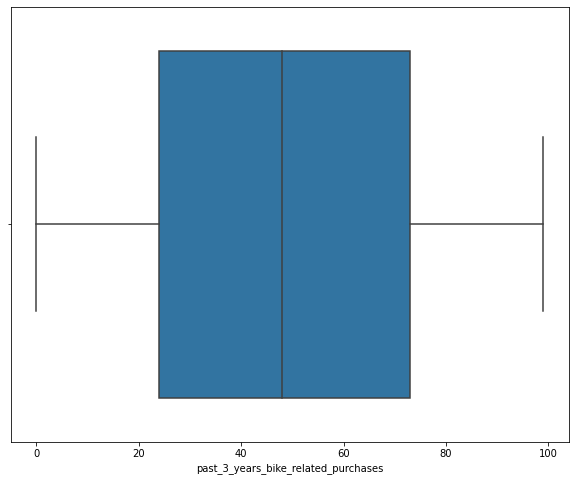

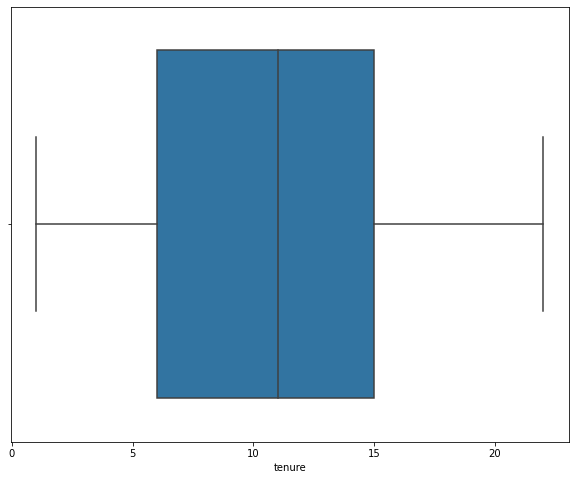

In [ ]:
import seaborn as sns
col_outlier = ['past_3_years_bike_related_purchases','tenure']
for col in df1[col_outlier]:
  plt.figure(figsize=(10,8))
  sns.boxplot(df1[col])

Data Preprocessing CustomerDemographic DataFrame (df1) : Feature Enginerring


--> Adding Demographic Info : Age

In [ ]:
now = pd.Timestamp('now')
df1['age'] = (now - df1['DOB']).astype('<m8[Y]') # 3
#x['age'] = (now-x['DOB']).astype('<m8[Y]')

In [ ]:
df1.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,Laraine Medendorp,Female,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11,67.0
1,2,Eli Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,40.0
2,3,Arlin Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,Yes,15,66.0
3,4,Talbot,Male,33,1961-10-03 00:00:00,Other,IT,Mass Customer,N,No,7,59.0
4,5,Sheila-kathryn Calton,Female,56,1977-05-13 00:00:00,Senior Editor,Other,Affluent Customer,N,Yes,8,43.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


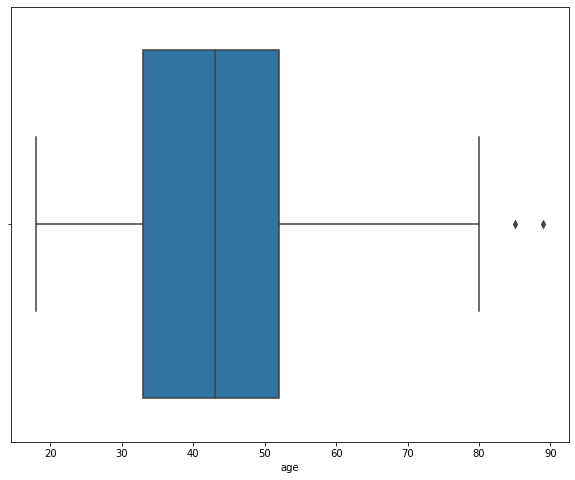

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.boxplot(df1['age'])

**Data Preprocessing Customer Address DataFrame (df2)**

---



Data Preprocessing Customer Address DataFrame (df2) : Data Transformation




In [ ]:
df2.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   object
 1   address             3999 non-null   object
 2   postcode            3999 non-null   object
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   object
dtypes: object(6)
memory usage: 187.6+ KB


In [ ]:
df2.isnull().sum()

0
customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [ ]:
df2.customer_id.nunique()

3999

In [ ]:
for col in df2.columns:
  print('\nUnique Value in feature "{}" :'.format(col))
  print(df2[col].value_counts())


Unique Value in feature "customer_id" :
4003    1
1332    1
1345    1
1344    1
1343    1
       ..
2665    1
2664    1
2663    1
2662    1
1       1
Name: customer_id, Length: 3999, dtype: int64

Unique Value in feature "address" :
64 Macpherson Junction     2
3 Mariners Cove Terrace    2
3 Talisman Place           2
01 Nevada Alley            1
627 Ronald Regan Alley     1
                          ..
375 Luster Parkway         1
72258 Bayside Court        1
751 Cordelia Terrace       1
41 Spaight Road            1
36 Vidon Parkway           1
Name: address, Length: 3996, dtype: int64

Unique Value in feature "postcode" :
2170    31
2145    30
2155    30
2153    29
2560    26
        ..
2469     1
4155     1
2474     1
3093     1
3094     1
Name: postcode, Length: 873, dtype: int64

Unique Value in feature "state" :
NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

Unique Value in featur

**Note:** 

We notice the unstandard value in State. To addres this problem, we sould use .replace in order to standardize the value

In [ ]:
df2 = df2.replace(to_replace=['New South Wales','Victoria'], value = ['NSW','VIC'])
print(df2.state.value_counts())

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64


In [ ]:
print('Customer Address Info')
print(df2.info())
print(df2.isnull().any())

Customer Address Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB
None
0
customer_id           False
address               False
postcode              False
state                 False
country               False
property_valuation    False
dtype: bool


**Note**:
Now the Customer Adrees dataset is celan and we are going to combine the customer demographic and customer address

In [ ]:
df_customer_demographic = pd.merge(df1, df2, on='customer_id') #CustomerDemographic Dataset
df_customer_demographic

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,address,postcode,state,country,property_valuation
0,1,Laraine Medendorp,Female,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11,67.0,060 Morning Avenue,2016,NSW,Australia,10
1,2,Eli Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,40.0,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,Talbot,Male,33,1961-10-03 00:00:00,Other,IT,Mass Customer,N,No,7,59.0,0 Holy Cross Court,4211,QLD,Australia,9
3,5,Sheila-kathryn Calton,Female,56,1977-05-13 00:00:00,Senior Editor,Other,Affluent Customer,N,Yes,8,43.0,17979 Del Mar Point,2448,NSW,Australia,4
4,6,Curr Duckhouse,Male,35,1966-09-16 00:00:00,Other,Retail,High Net Worth,N,Yes,13,54.0,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3903,3995,Rusty Iapico,Male,93,1975-12-12 00:00:00,Staff Scientist,Manufacturing,Mass Customer,N,Yes,14,45.0,613 Erie Lane,2088,NSW,Australia,12
3904,3996,Rosalia Halgarth,Female,8,1975-08-09 00:00:00,VP Product Management,Health,Mass Customer,N,No,19,45.0,0 Transport Center,3977,VIC,Australia,6
3905,3997,Blanch Nisuis,Female,87,2001-07-13 00:00:00,Statistician II,Manufacturing,High Net Worth,N,Yes,1,19.0,4 Dovetail Crossing,2350,NSW,Australia,2
3906,3999,Patrizius,Male,11,1973-10-24 00:00:00,Other,Manufacturing,Affluent Customer,N,Yes,10,47.0,1482 Hauk Trail,3064,VIC,Australia,3


In [ ]:
# Re-arrange the columns
df_customer_demographic.columns

Index(['customer_id', 'name', 'gender', 'past_3_years_bike_related_purchases',
       'DOB', 'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'tenure', 'age', 'address',
       'postcode', 'state', 'country', 'property_valuation'],
      dtype='object', name=0)

In [ ]:
df_customer_demographic = df_customer_demographic.reindex(columns=['customer_id', 'name', 'gender','DOB','age','address','postcode', 'state', 'country','deceased_indicator','job_title', 
                    'job_industry_category','tenure','past_3_years_bike_related_purchases','owns_car','property_valuation','wealth_segment'])
df_customer_demographic.head()

,customer_id,name,gender,DOB,age,address,postcode,state,country,deceased_indicator,job_title,job_industry_category,tenure,past_3_years_bike_related_purchases,owns_car,property_valuation,wealth_segment
0,1,Laraine Medendorp,Female,1953-10-12 00:00:00,67.0,060 Morning Avenue,2016,NSW,Australia,N,Executive Secretary,Health,11,93,Yes,10,Mass Customer
1,2,Eli Bockman,Male,1980-12-16 00:00:00,40.0,6 Meadow Vale Court,2153,NSW,Australia,N,Administrative Officer,Financial Services,16,81,Yes,10,Mass Customer
2,4,Talbot,Male,1961-10-03 00:00:00,59.0,0 Holy Cross Court,4211,QLD,Australia,N,Other,IT,7,33,No,9,Mass Customer
3,5,Sheila-kathryn Calton,Female,1977-05-13 00:00:00,43.0,17979 Del Mar Point,2448,NSW,Australia,N,Senior Editor,Other,8,56,Yes,4,Affluent Customer
4,6,Curr Duckhouse,Male,1966-09-16 00:00:00,54.0,9 Oakridge Court,3216,VIC,Australia,N,Other,Retail,13,35,Yes,9,High Net Worth


Information is included by sex and age group as follows: 0-14 years (children), 15-24 years (early working age), 25-54 years (prime working age), 55-64 years (mature working age), 65 years and over (elderly).

In [ ]:
df_customer_demographic.age.describe()

count    3908.000000
mean       42.920676
std        12.608976
min        18.000000
25%        33.000000
50%        43.000000
75%        52.000000
max        89.000000
Name: age, dtype: float64

In [ ]:
bins = [18, 25, 55, 65, 100]
labels = ['18-24', '25-54', '55-64', '65+']
df_customer_demographic['age_range'] = pd.cut(df_customer_demographic.age, bins, labels = labels,include_lowest = True)

df_customer_demographic.head()

,customer_id,name,gender,DOB,age,address,postcode,state,country,deceased_indicator,job_title,job_industry_category,tenure,past_3_years_bike_related_purchases,owns_car,property_valuation,wealth_segment,age_range
0,1,Laraine Medendorp,Female,1953-10-12 00:00:00,67.0,060 Morning Avenue,2016,NSW,Australia,N,Executive Secretary,Health,11,93,Yes,10,Mass Customer,65+
1,2,Eli Bockman,Male,1980-12-16 00:00:00,40.0,6 Meadow Vale Court,2153,NSW,Australia,N,Administrative Officer,Financial Services,16,81,Yes,10,Mass Customer,25-54
2,4,Talbot,Male,1961-10-03 00:00:00,59.0,0 Holy Cross Court,4211,QLD,Australia,N,Other,IT,7,33,No,9,Mass Customer,55-64
3,5,Sheila-kathryn Calton,Female,1977-05-13 00:00:00,43.0,17979 Del Mar Point,2448,NSW,Australia,N,Senior Editor,Other,8,56,Yes,4,Affluent Customer,25-54
4,6,Curr Duckhouse,Male,1966-09-16 00:00:00,54.0,9 Oakridge Court,3216,VIC,Australia,N,Other,Retail,13,35,Yes,9,High Net Worth,25-54


In [ ]:
df_customer_demographic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3908 entries, 0 to 3907
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   customer_id                          3908 non-null   object  
 1   name                                 3908 non-null   object  
 2   gender                               3908 non-null   object  
 3   DOB                                  3908 non-null   object  
 4   age                                  3908 non-null   float64 
 5   address                              3908 non-null   object  
 6   postcode                             3908 non-null   int64   
 7   state                                3908 non-null   object  
 8   country                              3908 non-null   object  
 9   deceased_indicator                   3908 non-null   object  
 10  job_title                            3908 non-null   object  
 11  job_industry_cate

In [ ]:
df_customer_demographic['past_3_years_bike_related_purchases'] = df_customer_demographic['past_3_years_bike_related_purchases'].astype(int)
df_customer_demographic['tenure'] = df_customer_demographic['tenure'].astype(int) 
df_customer_demographic['customer_id'] = df_customer_demographic['customer_id'].astype(int)

In [ ]:
df_customer_demographic.columns

Index(['customer_id', 'name', 'gender', 'DOB', 'age', 'address', 'postcode',
       'state', 'country', 'deceased_indicator', 'job_title',
       'job_industry_category', 'tenure',
       'past_3_years_bike_related_purchases', 'owns_car', 'property_valuation',
       'wealth_segment', 'age_range'],
      dtype='object', name=0)

In [ ]:
df_customer_demographic = df_customer_demographic.reindex(columns= ['customer_id', 'name', 'gender', 'DOB', 'age', 'age_range', 'address', 'postcode',
       'state', 'country', 'deceased_indicator', 'job_title',
       'job_industry_category', 'tenure',
       'past_3_years_bike_related_purchases', 'owns_car', 'property_valuation',
       'wealth_segment'])
df_customer_demographic = df_customer_demographic.rename_axis(None, axis = 1)
print(df_customer_demographic.head())

   customer_id                   name  ... property_valuation     wealth_segment
0            1      Laraine Medendorp  ...                 10      Mass Customer
1            2            Eli Bockman  ...                 10      Mass Customer
2            4                 Talbot  ...                  9      Mass Customer
3            5  Sheila-kathryn Calton  ...                  4  Affluent Customer
4            6         Curr Duckhouse  ...                  9     High Net Worth

[5 rows x 18 columns]


In [ ]:
for col in df_customer_demographic.columns:
  print('Unique Value in Feature "{}":'.format(col))
  print(df_customer_demographic[col].value_counts())

Unique Value in Feature "customer_id":
2047    1
2728    1
2724    1
673     1
2720    1
       ..
3367    1
1318    1
3363    1
1314    1
2049    1
Name: customer_id, Length: 3908, dtype: int64
Unique Value in Feature "name":
Corabelle              2
Breena Risebrow        1
Giorgi Hurford         1
Tracie Bartolomeoni    1
Lyn Luquet             1
                      ..
Der Blatcher           1
Winslow Hammant        1
Evelina Bavin          1
Isadora Gronaller      1
Idalina Wilcot         1
Name: name, Length: 3907, dtype: int64
Unique Value in Feature "gender":
Female    2037
Male      1871
Name: gender, dtype: int64
Unique Value in Feature "DOB":
1978-01-30    7
1962-12-17    4
1977-05-13    4
1964-07-08    4
1978-08-19    4
             ..
1986-05-03    1
1986-01-21    1
1981-05-14    1
1964-05-29    1
1962-05-05    1
Name: DOB, Length: 3443, dtype: int64
Unique Value in Feature "age":
42.0    217
43.0    204
46.0    155
44.0    152
40.0    122
41.0    120
47.0    117
34.0    

In [ ]:
df_customer_demographic.head()
df_customer_demographic.to_excel('customer_demographic_datasets.xlsx')

**Data Preprocessing Transaction List (df3)**

Data Preprocessing Transaction List : Data Transformation

In [ ]:
df3.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
1,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
2,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
3,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
4,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


--> Checking Missing Values

In [ ]:
df3.isnull().sum()

0
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

--> Dealing with Missing Values

In [ ]:
#df3_test = df3.copy(deep=True)
df3_col_miss_value = ['online_order', 'brand', 'product_line','product_class', 'product_size', 'standard_cost', 'product_first_sold_date'] 
for col in df3_col_miss_value:
  if col == 'online_order': 
    df3.dropna(subset= ['online_order'], inplace = True)  
  elif col == 'brand' :
    df3[col].fillna(value = 'Other', inplace = True)
  elif col == 'product_line': 
    df3[col].fillna(value = 'Other', inplace = True)
  elif col == 'product_size':
    df3[col].fillna(value = 'Other', inplace = True)
  elif col == 'standard_cost':
    df3.dropna(subset=['standard_cost'], inplace = True)
  else:
    df3.dropna(subset = ['product_first_sold_date'], inplace= True)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           19445 non-null  object
 1   product_id               19445 non-null  object
 2   customer_id              19445 non-null  object
 3   transaction_date         19445 non-null  object
 4   online_order             19445 non-null  object
 5   order_status             19445 non-null  object
 6   brand                    19445 non-null  object
 7   product_line             19445 non-null  object
 8   product_class            19445 non-null  object
 9   product_size             19445 non-null  object
 10  list_price               19445 non-null  object
 11  standard_cost            19445 non-null  object
 12  product_first_sold_date  19445 non-null  object
dtypes: object(13)
memory usage: 2.1+ MB


In [ ]:
df3.isnull().sum()

0
transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

--> Checking Unstandard Data

In [ ]:
for col in df3.columns:
  print('\nUnique Value in Feature "{}" :'.format(col))
  print(df3[col].value_counts())


Unique Value in Feature "transaction_id" :
20000    1
6641     1
6643     1
6645     1
6646     1
        ..
13320    1
13321    1
13322    1
13323    1
1        1
Name: transaction_id, Length: 19445, dtype: int64

Unique Value in Feature "product_id" :
0      1157
3       349
1       305
38      267
35      261
       ... 
16      134
71      134
8       132
100     126
47      118
Name: product_id, Length: 101, dtype: int64

Unique Value in Feature "customer_id" :
1068    14
2183    14
2476    14
1946    13
2548    13
        ..
2749     1
3161     1
302      1
1325     1
2532     1
Name: customer_id, Length: 3492, dtype: int64

Unique Value in Feature "transaction_date" :
2017-02-14    81
2017-08-18    81
2017-10-15    73
2017-01-31    72
2017-12-19    70
              ..
2017-12-07    37
2017-01-12    36
2017-09-25    35
2017-03-29    34
2017-10-19    32
Name: transaction_date, Length: 364, dtype: int64

Unique Value in Feature "online_order" :
True     9739
False    9706
Name: on

**Note** : All value within all feature are standard

--> Checking unique transaction ID

In [ ]:
print('Unique Values in Transaction ID:')
print(df3['transaction_id'].nunique())

Unique Values in Transaction ID:
19445


**Note** : Its Unique

--> Making date format in feature 'product_first_sold_date' valid (Still cant find the method)

In [ ]:
from datetime import datetime
df3['product_first_sold_date'] = df3['product_first_sold_date'].astype(float)
now = pd.Timestamp('now')
df3['product_first_sold_date'] = pd.to_datetime(df3['product_first_sold_date'],unit='D', origin=pd.Timestamp('1900-01-01'))#based on microsoft excel origin format 

In [ ]:
df3.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-04
1,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-05
2,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-22
3,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,1998-12-18
4,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,2015-08-12


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  object        
 1   product_id               19445 non-null  object        
 2   customer_id              19445 non-null  object        
 3   transaction_date         19445 non-null  object        
 4   online_order             19445 non-null  object        
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  object        
 11  standard_cost            19445 non-null  object        
 12  product_first_sold_date  19445 n

Data Preprocessing Transaction List : Feature Engineering

--> Add Profit Attribute

In [ ]:
df3['profit'] = df3['list_price']-df3['standard_cost']

--> Add RFM (recency, frequency, monetary)

In [ ]:
import datetime as dt
df3_test = df3.copy(deep=True)
df3_test['transaction_date'] = pd.to_datetime(df3_test['transaction_date'])
NOW = df3_test['transaction_date'].max()
rfmTable = df3_test.groupby('customer_id').agg({'transaction_date': lambda x: (NOW - x.max()).days, # Recency
                                        'transaction_id': lambda x: len(x),      # Frequency
                                        'profit': lambda x: x.sum()}) # Monetary Value

rfmTable['transaction_date'] = rfmTable['transaction_date'].astype(int)
rfmTable.rename(columns={'transaction_date': 'recency', 
                         'transaction_id': 'frequency', 
                         'profit': 'monetary_value'}, inplace=True)
rfmTable.reset_index(level=0, inplace=True)
rfmTable.head()

,customer_id,recency,frequency,monetary_value
0,1,7,11,3018.09
1,2,128,3,2226.26
2,3,102,7,3290.21
3,4,195,2,220.57
4,5,16,6,2394.94


In [ ]:
quantiles = rfmTable.drop(columns = 'customer_id').quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
rfmSegmentation = rfmTable

# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = dataframe Value row list)
def RFM_Class (x):
  L = []
  for elm in x:
    L.append(elm)
  return "".join(L)

def RFM_score (x):
  L = []
  for elm in x:
    L.append(elm)
  return np.sum(L)

# Feature Enginering For RFM Analysis
rfmSegmentation['R_Quartile'] = rfmSegmentation['recency'].apply(RClass, args=('recency',quantiles))
rfmSegmentation['F_Quartile'] = rfmSegmentation['frequency'].apply(FMClass, args=('frequency',quantiles))
rfmSegmentation['M_Quartile'] = rfmSegmentation['monetary_value'].apply(FMClass, args=('monetary_value',quantiles))
rfmSegmentation['RFM_Class'] = rfmSegmentation[rfmSegmentation.columns[4:7]].astype(str).apply(RFM_Class, axis=1)
rfmSegmentation['RFM_Score'] = rfmSegmentation[rfmSegmentation.columns[4:7]].apply(RFM_score, axis=1)
rfmSegmentation['Score'] = 'Green'
rfmSegmentation.loc[rfmSegmentation['RFM_Score']>5,'Score'] = 'Bronze' 
rfmSegmentation.loc[rfmSegmentation['RFM_Score']>7,'Score'] = 'Silver' 
rfmSegmentation.loc[rfmSegmentation['RFM_Score']>9,'Score'] = 'Gold' 
rfmSegmentation.loc[rfmSegmentation['RFM_Score']>10,'Score'] = 'Platinum'

rfmSegmentation.head()

,customer_id,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFM_Class,RFM_Score,Score
0,1,7,11,3018.09,1,1,2,112,4,Green
1,2,128,3,2226.26,4,4,3,443,11,Platinum
2,3,102,7,3290.21,4,2,2,422,8,Silver
3,4,195,2,220.57,4,4,4,444,12,Platinum
4,5,16,6,2394.94,1,2,3,123,6,Bronze


In [ ]:
rfmSegmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3492 entries, 0 to 3491
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     3492 non-null   int64  
 1   recency         3492 non-null   int64  
 2   frequency       3492 non-null   int64  
 3   monetary_value  3492 non-null   float64
 4   R_Quartile      3492 non-null   int64  
 5   F_Quartile      3492 non-null   int64  
 6   M_Quartile      3492 non-null   int64  
 7   RFM_Class       3492 non-null   object 
 8   RFM_Score       3492 non-null   int64  
 9   Score           3492 non-null   object 
dtypes: float64(1), int64(7), object(2)
memory usage: 272.9+ KB


--> Add 6 bike brands Attribute

In [ ]:
df3['brand'].value_counts()

Solex             4169
WeareA2B          3245
Giant Bicycles    3244
OHM Cycles        2993
Trek Bicycles     2931
Norco Bicycles    2863
Name: brand, dtype: int64

In [ ]:
brand_solex = df3.copy(deep=True)
brand_solex['Valid'] = brand_solex['brand'].astype(str).str.match(r'Solex')
brand_solex = brand_solex[brand_solex['Valid']==True].drop(columns=['Valid','transaction_id','product_id',
                                                                                               'transaction_date','online_order',
                                                                                               'order_status','product_line','product_class',
                                                                                               'product_size','list_price','standard_cost',
                                                                                               'product_first_sold_date','profit'],axis = 1)
brand_solex = pd.DataFrame(brand_solex.groupby('customer_id')['brand'].value_counts())
brand_solex.columns = ['Solex']
brand_solex.reset_index(level=0,inplace = True)
brand_solex.reset_index(level=0,inplace = True)
brand_solex.drop(columns=['brand'], axis = 1,inplace=True)


brand_weareA2B = df3.copy(deep=True)
brand_weareA2B['Valid']= brand_weareA2B['brand'].astype(str).str.match(r'WeareA2B')
brand_weareA2B = brand_weareA2B[brand_weareA2B['Valid']==True].drop(columns = ['Valid','transaction_id','product_id',
                                                                                               'transaction_date','online_order',
                                                                                               'order_status','product_line','product_class',
                                                                                               'product_size','list_price','standard_cost',
                                                                                               'product_first_sold_date','profit'], axis = 1)
brand_weareA2B = pd.DataFrame(brand_weareA2B.groupby('customer_id')['brand'].value_counts())
brand_weareA2B.columns = ['WeareA2B']
brand_weareA2B.reset_index(level=0,inplace = True)
brand_weareA2B.reset_index(level=0,inplace = True)
brand_weareA2B.drop(columns=['brand'], axis = 1,inplace=True)


brand_giant_bicycles = df3.copy(deep = True)
brand_giant_bicycles['Valid'] = brand_giant_bicycles['brand'].astype(str).str.match(r'Giant Bicycles')
brand_giant_bicycles = brand_giant_bicycles[brand_giant_bicycles['Valid']==True].drop(columns=['Valid','transaction_id','product_id',
                                                                                               'transaction_date','online_order',
                                                                                               'order_status','product_line','product_class',
                                                                                               'product_size','list_price','standard_cost',
                                                                                               'product_first_sold_date','profit'],axis = 1)
brand_giant_bicycles = pd.DataFrame(brand_giant_bicycles.groupby('customer_id')['brand'].value_counts())
brand_giant_bicycles.columns = ['Giant Bicycles']
brand_giant_bicycles.reset_index(level=0,inplace = True)
brand_giant_bicycles.reset_index(level=0,inplace = True)
brand_giant_bicycles.drop(columns=['brand'], axis = 1,inplace=True)


brand_ohm_cycles = df3.copy(deep=True)
brand_ohm_cycles['Valid'] = brand_ohm_cycles['brand'].astype(str).str.match(r'OHM Cycles')
brand_ohm_cycles = brand_ohm_cycles[brand_ohm_cycles['Valid']==True].drop(columns=['Valid','transaction_id','product_id',
                                                                                               'transaction_date','online_order',
                                                                                               'order_status','product_line','product_class',
                                                                                               'product_size','list_price','standard_cost',
                                                                                               'product_first_sold_date','profit'],axis = 1)
brand_ohm_cycles = pd.DataFrame(brand_ohm_cycles.groupby('customer_id')['brand'].value_counts())
brand_ohm_cycles.columns = ['OHM Cycles']
brand_ohm_cycles.reset_index(level=0,inplace = True)
brand_ohm_cycles.reset_index(level=0,inplace = True)
brand_ohm_cycles.drop(columns=['brand'], axis = 1,inplace=True)


brand_trek_bicycles = df3.copy(deep=True)
brand_trek_bicycles['Valid'] = brand_trek_bicycles['brand'].astype(str).str.match(r'Trek Bicycles')
brand_trek_bicycles = brand_trek_bicycles[brand_trek_bicycles['Valid']==True].drop(columns=['Valid','transaction_id','product_id',
                                                                                               'transaction_date','online_order',
                                                                                               'order_status','product_line','product_class',
                                                                                               'product_size','list_price','standard_cost',
                                                                                               'product_first_sold_date','profit'],axis = 1)
brand_trek_bicycles = pd.DataFrame(brand_trek_bicycles.groupby('customer_id')['brand'].value_counts())
brand_trek_bicycles.columns = ['Trek Bicycles']
brand_trek_bicycles.reset_index(level=0,inplace = True)
brand_trek_bicycles.reset_index(level=0,inplace = True)
brand_trek_bicycles.drop(columns=['brand'], axis = 1,inplace=True)


brand_norco_bicycles = df3.copy(deep=True)
brand_norco_bicycles['Valid'] = brand_norco_bicycles['brand'].astype(str).str.match(r'Norco Bicycles')
brand_norco_bicycles = brand_norco_bicycles[brand_norco_bicycles['Valid']==True].drop(columns=['Valid','transaction_id','product_id',
                                                                                               'transaction_date','online_order',
                                                                                               'order_status','product_line','product_class',
                                                                                               'product_size','list_price','standard_cost',
                                                                                               'product_first_sold_date','profit'], axis = 1)
brand_norco_bicycles = pd.DataFrame(brand_norco_bicycles.groupby('customer_id')['brand'].value_counts())
brand_norco_bicycles.columns = ['Norco Bicycles']
brand_norco_bicycles.reset_index(level=0,inplace = True)
brand_norco_bicycles.reset_index(level=0,inplace = True)
brand_norco_bicycles.drop(columns=['brand'], axis = 1,inplace=True)


In [ ]:
def brands_dataframe(brand_list):
  brand_list = [brand_solex,brand_giant_bicycles,brand_weareA2B,brand_ohm_cycles,brand_trek_bicycles,brand_norco_bicycles]
  left_brands_2nd = brand_list[0]
  right_brands_2nd = brand_list[1]
  brands_2nd_merge = pd.merge(left = left_brands_2nd,right = right_brands_2nd,how='outer', sort = True)
  left_brands_3rd = brands_2nd_merge
  right_brands_3rd = brand_list[2]
  brands_3rd_merge = pd.merge(left = left_brands_3rd,right = right_brands_3rd, how='outer', sort = True )
  left_brands_4th = brands_3rd_merge
  right_brands_4th = brand_list[3]
  brands_4th_merge = pd.merge(left = left_brands_4th, right = right_brands_4th, how = 'outer', sort = True)
  left_brands_5th = brands_4th_merge
  right_brands_5th = brand_list[4]
  brands_5th_merge = pd.merge(left = left_brands_5th, right = right_brands_5th, how = 'outer', sort = True)
  left_brands_6th = brands_5th_merge
  right_brands_6th = brand_list[5]
  brands_6th_merge = pd.merge(left = left_brands_6th, right = right_brands_6th, how = 'outer', sort = True)  
  return brands_6th_merge

brand_list = [brand_solex,brand_giant_bicycles,brand_weareA2B,brand_ohm_cycles,brand_trek_bicycles,brand_norco_bicycles]
df_brands = pd.DataFrame(brands_dataframe(brand_list))

df_brands.info()
df_brands.fillna(value = 0, inplace = True)
df_brands = df_brands.astype(int)
df_brands.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3492 entries, 0 to 3491
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     3492 non-null   int64  
 1   Solex           2446 non-null   float64
 2   Giant Bicycles  2155 non-null   float64
 3   WeareA2B        2138 non-null   float64
 4   OHM Cycles      1994 non-null   float64
 5   Trek Bicycles   2004 non-null   float64
 6   Norco Bicycles  1922 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 218.2 KB


,customer_id,Solex,Giant Bicycles,WeareA2B,OHM Cycles,Trek Bicycles,Norco Bicycles
0,1,2,4,0,2,1,2
1,2,0,1,2,0,0,0
2,3,0,2,0,0,3,2
3,4,1,1,0,0,0,0
4,5,1,1,1,0,1,2


**Note** : As we have extract the important feature from transaction datasets according to the all insight which cover all the customer behavioral information, we are going to combine the extracted feature based on customer_id

In [ ]:
df3.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit'],
      dtype='object', name=0)

In [ ]:
df3_new2 = df3.drop(['transaction_id', 'product_id', 'transaction_date',
       'online_order', 'order_status', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit'], axis = 1)

In [ ]:
df3_new = pd.merge(df_brands,rfmSegmentation, on = 'customer_id')
#df3_new2 = pd.merge(rfmSegmentation, df3_new2, on = 'customer_id') 

In [ ]:
df3_new.head()
df3_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3492 entries, 0 to 3491
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     3492 non-null   int64  
 1   Solex           3492 non-null   int64  
 2   Giant Bicycles  3492 non-null   int64  
 3   WeareA2B        3492 non-null   int64  
 4   OHM Cycles      3492 non-null   int64  
 5   Trek Bicycles   3492 non-null   int64  
 6   Norco Bicycles  3492 non-null   int64  
 7   recency         3492 non-null   int64  
 8   frequency       3492 non-null   int64  
 9   monetary_value  3492 non-null   float64
 10  R_Quartile      3492 non-null   int64  
 11  F_Quartile      3492 non-null   int64  
 12  M_Quartile      3492 non-null   int64  
 13  RFM_Class       3492 non-null   object 
 14  RFM_Score       3492 non-null   int64  
 15  Score           3492 non-null   object 
dtypes: float64(1), int64(13), object(2)
memory usage: 463.8+ KB


In [ ]:
df = pd.merge(df_customer_demographic,df3_new, on = 'customer_id')
df.to_excel('combined_dataframe_Sprocket_Central.xlsx')
df.head()

,customer_id,name,gender,DOB,age,age_range,address,postcode,state,country,deceased_indicator,job_title,job_industry_category,tenure,past_3_years_bike_related_purchases,owns_car,property_valuation,wealth_segment,Solex,Giant Bicycles,WeareA2B,OHM Cycles,Trek Bicycles,Norco Bicycles,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFM_Class,RFM_Score,Score
0,1,Laraine Medendorp,Female,1953-10-12 00:00:00,67.0,65+,060 Morning Avenue,2016,NSW,Australia,N,Executive Secretary,Health,11,93,Yes,10,Mass Customer,2,4,0,2,1,2,7,11,3018.09,1,1,2,112,4,Green
1,2,Eli Bockman,Male,1980-12-16 00:00:00,40.0,25-54,6 Meadow Vale Court,2153,NSW,Australia,N,Administrative Officer,Financial Services,16,81,Yes,10,Mass Customer,0,1,2,0,0,0,128,3,2226.26,4,4,3,443,11,Platinum
2,4,Talbot,Male,1961-10-03 00:00:00,59.0,55-64,0 Holy Cross Court,4211,QLD,Australia,N,Other,IT,7,33,No,9,Mass Customer,1,1,0,0,0,0,195,2,220.57,4,4,4,444,12,Platinum
3,5,Sheila-kathryn Calton,Female,1977-05-13 00:00:00,43.0,25-54,17979 Del Mar Point,2448,NSW,Australia,N,Senior Editor,Other,8,56,Yes,4,Affluent Customer,1,1,1,0,1,2,16,6,2394.94,1,2,3,123,6,Bronze
4,6,Curr Duckhouse,Male,1966-09-16 00:00:00,54.0,25-54,9 Oakridge Court,3216,VIC,Australia,N,Other,Retail,13,35,Yes,9,High Net Worth,0,2,2,0,1,0,64,5,3946.55,3,3,2,332,8,Silver


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3410 entries, 0 to 3409
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   customer_id                          3410 non-null   int64   
 1   name                                 3410 non-null   object  
 2   gender                               3410 non-null   object  
 3   DOB                                  3410 non-null   object  
 4   age                                  3410 non-null   float64 
 5   age_range                            3410 non-null   category
 6   address                              3410 non-null   object  
 7   postcode                             3410 non-null   int64   
 8   state                                3410 non-null   object  
 9   country                              3410 non-null   object  
 10  deceased_indicator                   3410 non-null   object  
 11  job_title        

In [ ]:
df.RFM_Class.value_counts()

444    298
111    162
344    156
211    155
443    123
      ... 
441      7
413      6
241      5
214      2
314      1
Name: RFM_Class, Length: 61, dtype: int64

In [ ]:
df['postcode'].value_counts()

2153    28
2170    27
2155    26
2145    26
2770    22
        ..
3791     1
3786     1
3793     1
2535     1
4557     1
Name: postcode, Length: 829, dtype: int64

In [ ]:
gender_count = df['gender'].value_counts().reset_index(name='counts').rename(columns={'index':'gender'})
gender_count['percentage'] = round((gender_count['counts']/gender_count['counts'].sum())*100)
male = gender_count.copy(deep = True)
male['valid'] = male['gender'].astype(str).str.match('Male')
male = male[male['valid']==True].percentage.values

female = gender_count.copy(deep = True)
female['valid'] = female['gender'].astype(str).str.match('Female')
female = female[female['valid']==True].percentage.values
sizes = [female, male]
sizes

[array([52.]), array([48.])]

**Data Intrepration** : Customer Demographic Segmentation

--> Gender distribution

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


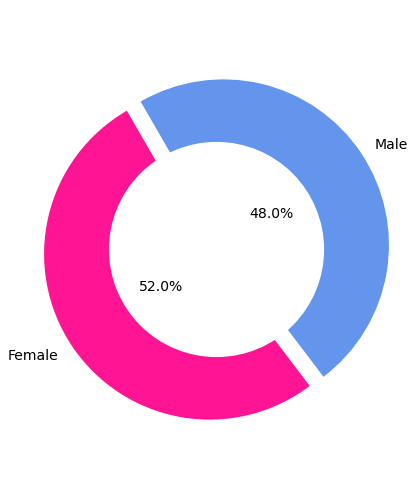

In [ ]:
# Pie chart
def gender_distribution():
  gender_count = df['gender'].value_counts().reset_index(name='counts').rename(columns={'index':'gender'})
  gender_count = df['gender'].value_counts().reset_index(name='counts').rename(columns={'index':'gender'})
  gender_count['percentage'] = round((gender_count['counts']/gender_count['counts'].sum())*100)
  male = gender_count.copy(deep = True)
  male['valid'] = male['gender'].astype(str).str.match('Male')
  male = male[male['valid']==True].percentage.values
  female = gender_count.copy(deep = True)
  female['valid'] = female['gender'].astype(str).str.match('Female')
  female = female[female['valid']==True].percentage.values
  labels = ['Female', 'Male']
  sizes = [female, male]
  #colors
  colors = ['deeppink','cornflowerblue']
  #explsion
  explode = (0.05,0.05)
  textprops = dict(size=14, color="black")
  plt.figure(figsize=(6,7))
  plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=120, 
          pctdistance=0.35, explode = explode, textprops=textprops)
  #draw circle
  centre_circle = plt.Circle((0,0),0.65,fc='white')
  fig = plt.gcf()
  fig.gca().add_artist(centre_circle)
  # Equal aspect ratio ensures that pie is drawn as a circle
  plt.axis('equal')  
  plt.tight_layout()
  #plt.xlabel('B')
  plt.show()
  #return gender_count
gender_distribution()

--> Customer age distribution

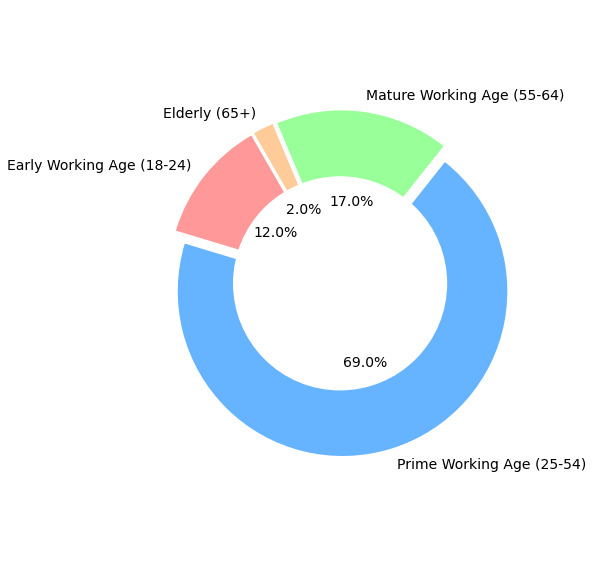

In [ ]:
def age_distribution():
  age_count = pd.DataFrame(df['age_range'].value_counts())
  age_count['percentage'] = round((age_count['age_range'] / age_count['age_range'].sum())*100)
  label = ['Early Working Age (18-24)','Prime Working Age (25-54)','Mature Working Age (55-64)','Elderly (65+)']
  size = [12,69,17,2]
  colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
  explode = [0.05,0.05,0.05,0.05]
  textprops = dict(size=14, color="black")
  plt.figure(figsize=(8,8))
  plt.pie(size, colors = colors,labels=label,autopct='%1.1f%%',startangle=120,pctdistance=0.45,shadow=False,explode = explode,textprops=textprops)
  centre_circle = plt.Circle((0,0),0.65,fc='white')
  fig = plt.gcf()
  fig.gca().add_artist(centre_circle)
  plt.axis('equal')
  plt.tight_layout()
  plt.show()
age_distribution()


--> Job Industry Category

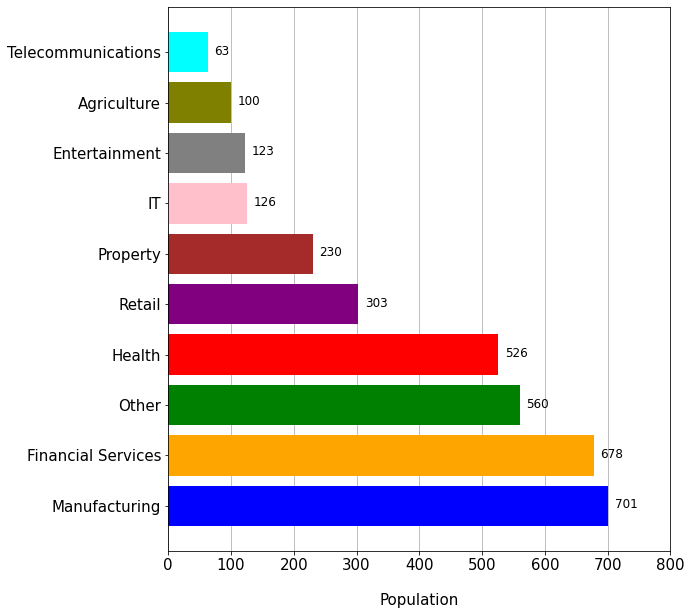

In [ ]:
def job_industry_distribution():
  job_industry_count = pd.DataFrame(df['job_industry_category'].value_counts())
  job_industry_count = job_industry_count.T.reset_index(drop = True)
  y_pos = np.arange(len(job_industry_count.columns))
  y_value = job_industry_count.iloc[0].values.tolist()
  plt.figure(figsize=(9,10))
  plt.barh(y_pos,y_value,color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'], zorder = 2)
  plt.yticks(y_pos,job_industry_count.columns)
  plt.grid(axis='x')
  for i,v in enumerate (y_value):
    plt.text(v+10,i-0.05, str(v), color = 'black', fontsize = 12)
  plt.xlim(0,800)
  plt.xlabel('Population', labelpad = 20, fontsize = 15)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.show()  
job_industry_distribution()



--> Tenure Vs Age Segmentation

In [ ]:
print(df['age_range'].values)

['65+', '25-54', '55-64', '25-54', '25-54', ..., '25-54', '25-54', '18-24', '25-54', '25-54']
Length: 3410
Categories (4, object): ['18-24' < '25-54' < '55-64' < '65+']


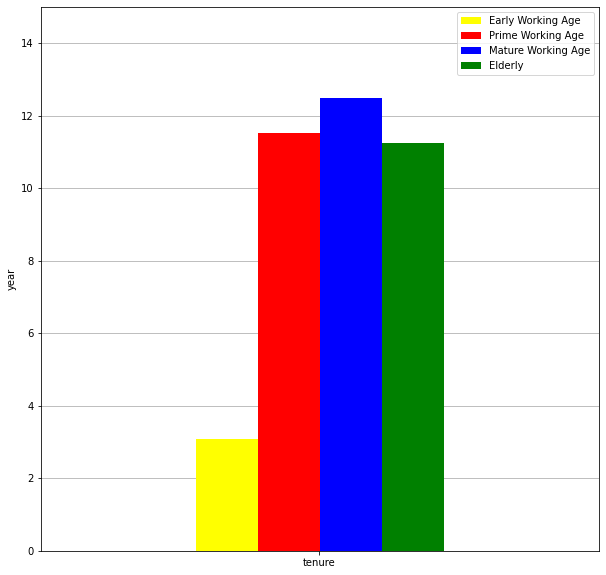

[3.0719602977667493]

In [ ]:
def age_based_tenure_distribution():
  subject = ['tenure']
  data1 = df.groupby('age_range')[subject].mean()
  index = np.arange(len(subject))
#score = np.arange(0,100,10)
  early_working = list(data1.T['18-24'])
  prime_working = list(data1.T['25-54'])
  mature_working = list(data1.T['55-64'])
  elderly = list(data1.T['65+']) 
#data1 = data1.reset_index(drop = True)
  #fig,ax = plt.subplots()
  bar_width = 0.1
  plt.figure(figsize=[10,10])
  plt.bar(index,early_working, width = bar_width, color = 'yellow', label = 'Early Working Age', zorder = 2)
  plt.bar(index + bar_width , prime_working, width=bar_width, color = 'red', label = 'Prime Working Age',zorder = 2)
  plt.bar(index + bar_width*2, mature_working,width = bar_width, color = 'blue', label = 'Mature Working Age',zorder = 2)
  plt.bar(index + bar_width*3,elderly, width = bar_width, color = 'green',label = 'Elderly',zorder = 2)
  plt.xticks(index + bar_width*1.48,subject)
  plt.ylabel('year')
  plt.legend()
  plt.grid(axis='y')
  plt.ylim(0,15)
  plt.xlim(-0.3,0.6)
  plt.show()
  return early_working
age_based_tenure_distribution()

--> Customer State Distribution

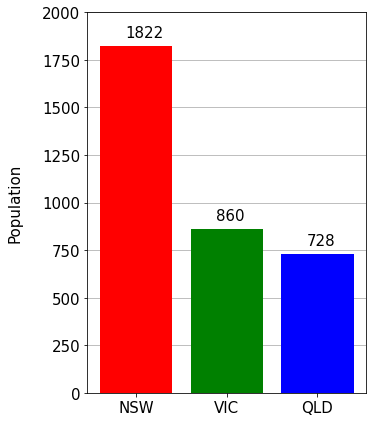

In [ ]:
def state_distribution():
  state_count = df['state'].value_counts()
  state_count = pd.DataFrame(state_count).T.reset_index(drop=True)
  x_pos = np.arange(len(state_count.columns))
  x_value = state_count.iloc[0].tolist()
  plt.figure(figsize=(5,7))
  plt.bar(x_pos,x_value,color = ['red','green','blue'], zorder=2)
  plt.xticks(x_pos,state_count.columns, fontsize = 15)
  plt.yticks(fontsize = 15)
  plt.ylabel('Population', labelpad = 20, fontsize = 15)
  plt.grid(axis = 'y')
  for i, v in enumerate(x_value):
    plt.text(i-0.12,v+50,str(v), color = 'black', fontsize = 15)
  plt.ylim(0,2000)
  plt.show()
state_distribution()


--> Wealth Segment based on State

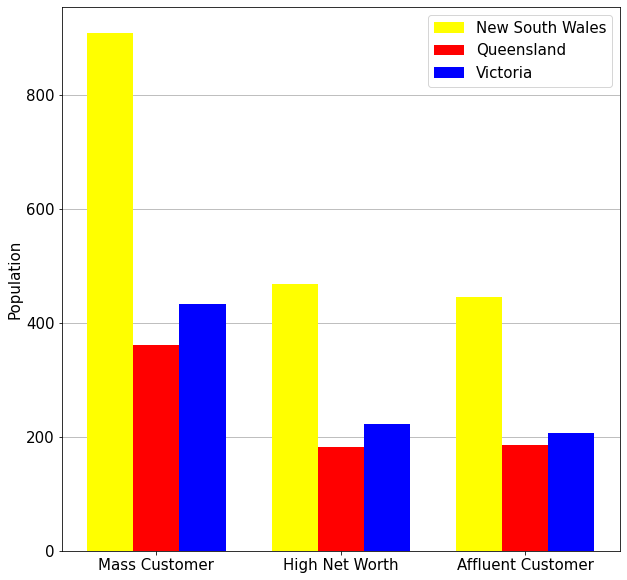

In [ ]:
def wealth_segment_based_state():
  state_nsw = df.copy(deep= True)
  state_nsw['Valid'] = state_nsw['state'].astype(str).str.match(r'NSW')
  state_nsw = state_nsw[state_nsw['Valid'] == True]
  state_nsw = state_nsw['wealth_segment'].value_counts().rename_axis('unique_values').reset_index(name='counts')
  state_nsw = state_nsw.T
  col_nsw = state_nsw.iloc[0]
  state_nsw.columns = col_nsw
  state_nsw = state_nsw.drop('unique_values').rename(index = {'counts':'NSW'})
  #state_nsw.columns.name = None

  state_qld = df.copy(deep= True)
  state_qld['Valid'] = state_qld['state'].astype(str).str.match(r'QLD')
  state_qld = state_qld[state_qld['Valid'] == True]
  state_qld = state_qld['wealth_segment'].value_counts().rename_axis('unique_values').reset_index(name='counts')
  state_qld = state_qld.T
  col_qld = state_qld.iloc[0]
  state_qld.columns = col_qld
  state_qld = state_qld.drop('unique_values').rename(index = {'counts':'QLD'})
  #state_qld.columns.name = None

  state_vic = df.copy(deep= True)
  state_vic['Valid'] = state_vic['state'].astype(str).str.match(r'VIC')
  state_vic = state_vic[state_vic['Valid'] == True]
  state_vic = state_vic['wealth_segment'].value_counts().rename_axis('unique_values').reset_index(name='counts')
  state_vic = state_vic.T
  col_vic = state_vic.iloc[0]
  state_vic.columns = col_vic
  state_vic = state_vic.drop('unique_values').rename(index = {'counts':'VIC'})
  #state_vic.columns.name = None
  df_state = pd.concat([state_nsw,state_qld,state_vic])
  wealth_segment = ['Mass Customer','High Net Worth','Affluent Customer']
  index = np.arange(len(wealth_segment))
  NSW = list(df_state.T['NSW'])
  QLD = list(df_state.T['QLD'])
  VIC = list(df_state.T['VIC'])
#data1 = data1.reset_index(drop = True)
#fig,ax = plt.subplots()
  bar_width = 0.25
  plt.figure(figsize=[10,10])
  plt.bar(index,NSW, width = bar_width, color = 'yellow', label = 'New South Wales', zorder = 2)
  plt.bar(index + bar_width , QLD, width=bar_width, color = 'red', label = 'Queensland',zorder = 2)
  plt.bar(index + bar_width*2, VIC,width = bar_width, color = 'blue', label = 'Victoria',zorder = 2)
  
  plt.xticks(index + bar_width*1,wealth_segment,fontsize=15)
  plt.yticks(fontsize = 15)
  plt.ylabel('Population', fontsize=15)
  plt.legend(fontsize=15)
  plt.grid(axis='y')
  plt.show()
wealth_segment_based_state()

,wealth segment,counts,age category
0,Mass Customer,200,early working age (18-24)
1,Affluent Customer,111,early working age (18-24)
2,High Net Worth,92,early working age (18-24)


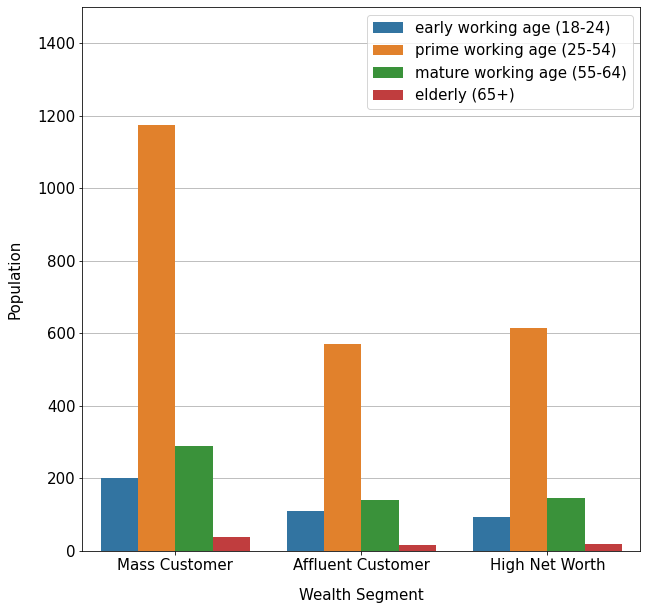

In [ ]:
def wealth_segment_based_age_range(x):
  #ewa: early working age, pwa: prime working age ,mwa: mature working age 
  # Create ewa DataFrame
  ewa = x.copy(deep = True)
  ewa['valid'] = ewa['age_range'].astype(str).str.match(r'18-24')
  ewa = ewa[ewa['valid']==True]
  ewa = ewa['wealth_segment'].value_counts().reset_index(
      name='counts').rename(columns={'index':'wealth segment'})
  ewa['age category'] = 'early working age (18-24)'
  # Create pwa DataFrame
  pwa = x.copy(deep = True)
  pwa['valid'] = pwa['age_range'].astype(str).str.match(r'25-54')
  pwa = pwa[pwa['valid']==True]
  pwa = pwa['wealth_segment'].value_counts().reset_index(
      name='counts').rename(columns = {'index': 'wealth segment'})
  pwa['age category'] = 'prime working age (25-54)'
  # Create pmwa DataFrame
  mwa = x.copy(deep = True)
  mwa['valid'] = mwa['age_range'].astype(str).str.match(r'55-64')
  mwa = mwa[mwa['valid']==True]
  mwa = mwa['wealth_segment'].value_counts().reset_index(
      name='counts').rename(columns ={'index':'wealth segment'})
  mwa['age category'] = 'mature working age (55-64)'
  # Create eld DataFrame
  eld = x.copy(deep=True)
  eld['valid'] = eld['age_range'].astype(str).str.match(r'65+')
  eld = eld[eld['valid']==True]
  eld = eld['wealth_segment'].value_counts().reset_index(
      name=('counts')).rename(columns = {'index':'wealth segment'})
  eld['age category'] = 'elderly (65+)'
  # Combine Each DataFrame
  df = pd.concat([ewa,pwa,mwa,eld])
  df = df.reset_index(drop = True)
  
  #Create Bar Graph
  import seaborn as sns
  plt.figure(figsize=(10,10))
  sns.barplot(x='wealth segment',y ='counts', hue='age category', data = df, zorder = 2)
  plt.ylabel("Population", size=15, labelpad = 15)
  plt.xlabel("Wealth Segment", size=15, labelpad = 15 )
  plt.xticks(fontsize = 15)
  plt.yticks(fontsize = 15)
  plt.grid(axis ='y')
  plt.legend(fontsize = 15)
  plt.ylim(0,1500)
  return ewa

wealth_segment_based_age_range= wealth_segment_based_age_range(df)
wealth_segment_based_age_range


In [ ]:
df

,customer_id,name,gender,DOB,age,age_range,address,postcode,state,country,deceased_indicator,job_title,job_industry_category,tenure,past_3_years_bike_related_purchases,owns_car,property_valuation,wealth_segment,Solex,Giant Bicycles,WeareA2B,OHM Cycles,Trek Bicycles,Norco Bicycles,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFM_Class,RFM_Score,Score
0,1,Laraine Medendorp,Female,1953-10-12 00:00:00,67.0,65+,060 Morning Avenue,2016,NSW,Australia,N,Executive Secretary,Health,11,93,Yes,10,Mass Customer,2,4,0,2,1,2,7,11,3018.09,1,1,2,112,4,Green
1,2,Eli Bockman,Male,1980-12-16 00:00:00,40.0,25-54,6 Meadow Vale Court,2153,NSW,Australia,N,Administrative Officer,Financial Services,16,81,Yes,10,Mass Customer,0,1,2,0,0,0,128,3,2226.26,4,4,3,443,11,Platinum
2,4,Talbot,Male,1961-10-03 00:00:00,59.0,55-64,0 Holy Cross Court,4211,QLD,Australia,N,Other,IT,7,33,No,9,Mass Customer,1,1,0,0,0,0,195,2,220.57,4,4,4,444,12,Platinum
3,5,Sheila-kathryn Calton,Female,1977-05-13 00:00:00,43.0,25-54,17979 Del Mar Point,2448,NSW,Australia,N,Senior Editor,Other,8,56,Yes,4,Affluent Customer,1,1,1,0,1,2,16,6,2394.94,1,2,3,123,6,Bronze
4,6,Curr Duckhouse,Male,1966-09-16 00:00:00,54.0,25-54,9 Oakridge Court,3216,VIC,Australia,N,Other,Retail,13,35,Yes,9,High Net Worth,0,2,2,0,1,0,64,5,3946.55,3,3,2,332,8,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3405,3496,Danya Burnyeat,Male,1986-04-25 00:00:00,34.0,25-54,2565 Caliangt Point,2171,NSW,Australia,N,Editor,Manufacturing,19,99,Yes,9,Mass Customer,1,0,0,0,1,2,256,4,2045.84,4,4,3,443,11,Platinum
3406,3497,Thia O'Day,Female,1986-05-03 00:00:00,34.0,25-54,96 Delladonna Trail,3976,VIC,Australia,N,Administrative Assistant IV,Manufacturing,18,73,Yes,5,Affluent Customer,1,2,0,0,0,0,52,3,1648.32,3,4,4,344,11,Platinum
3407,3498,Lois Abrahim,Female,1995-11-02 00:00:00,25.0,18-24,3 Nova Point,3012,VIC,Australia,N,Other,Manufacturing,5,28,No,4,Mass Customer,2,0,2,1,1,0,127,6,3147.33,4,2,2,422,8,Silver
3408,3499,Shelton Tewkesberrie,Male,1979-06-17 00:00:00,41.0,25-54,310 Stephen Terrace,4073,QLD,Australia,N,Other,Manufacturing,7,29,Yes,9,Mass Customer,2,2,2,0,0,1,51,7,4955.25,3,2,1,321,6,Bronze


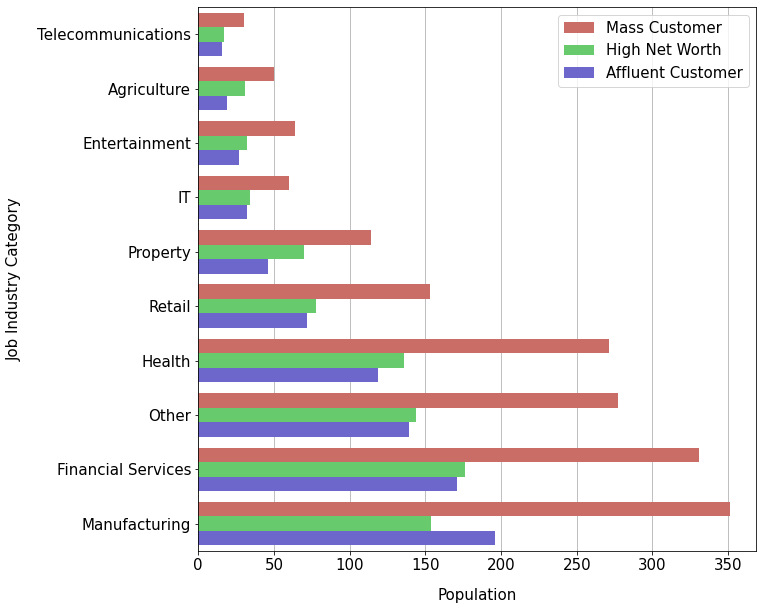

In [ ]:
def wealth_segment_based_job_industry(x):
  #tel: Telecomunication, 
  #arg: argiculture
  #ent: entertiment
  #it : IT
  #pro: property
  #ret: retail
  #hea : health
  #oth ; other
  #fin : financial service
  #manu : manufacturing

  # Create ewa DataFrame
  tel = x.copy(deep = True)
  tel['valid'] = tel['job_industry_category'].astype(str).str.match(r'Telecommunications')
  tel = tel[tel['valid']==True]
  tel = tel['wealth_segment'].value_counts().reset_index(
      name='counts').rename(columns={'index':'wealth segment'})
  tel['job industry'] = 'Telecommunications'
  # Create pwa DataFrame
  arg = x.copy(deep = True)
  arg['valid'] = arg['job_industry_category'].astype(str).str.match(r'Agriculture')
  arg = arg[arg['valid']==True]
  arg = arg['wealth_segment'].value_counts().reset_index(
      name='counts').rename(columns = {'index': 'wealth segment'})
  arg['job industry'] = 'Agriculture'
  # Create pmwa DataFrame
  ent = x.copy(deep = True)
  ent['valid'] = ent['job_industry_category'].astype(str).str.match(r'Entertainment')
  ent = ent[ent['valid']==True]
  ent = ent['wealth_segment'].value_counts().reset_index(
      name='counts').rename(columns ={'index':'wealth segment'})
  ent['job industry'] = 'Entertainment'
  # Create eld DataFrame
  it = x.copy(deep=True)
  it['valid'] = it['job_industry_category'].astype(str).str.match(r'IT')
  it = it[it['valid']==True]
  it = it['wealth_segment'].value_counts().reset_index(
      name=('counts')).rename(columns = {'index':'wealth segment'})
  it['job industry'] = 'IT'
  #
  pro = x.copy(deep = True)
  pro['valid'] = pro['job_industry_category'].astype(str).str.match(r'Property')
  pro = pro[pro['valid']==True]
  pro = pro['wealth_segment'].value_counts().reset_index(
      name=('counts')).rename(columns = {'index':'wealth segment'})
  pro['job industry'] = 'Property'
  #
  ret = x.copy(deep = True)
  ret['valid'] = ret['job_industry_category'].astype(str).str.match(r'Retail')
  ret = ret[ret['valid']==True]
  ret = ret['wealth_segment'].value_counts().reset_index(
      name=('counts')).rename(columns = {'index':'wealth segment'})
  ret['job industry'] = 'Retail'
  #
  hea = x.copy(deep = True)
  hea['valid'] = hea['job_industry_category'].astype(str).str.match(r'Health')
  hea = hea[hea['valid']==True]
  hea = hea['wealth_segment'].value_counts().reset_index(
      name=('counts')).rename(columns = {'index':'wealth segment'})
  hea['job industry'] = 'Health'
  #
  oth = x.copy(deep = True)
  oth['valid'] = oth['job_industry_category'].astype(str).str.match(r'Other')
  oth = oth[oth['valid']==True]
  oth = oth['wealth_segment'].value_counts().reset_index(
      name=('counts')).rename(columns = {'index':'wealth segment'})
  oth['job industry'] = 'Other'
  #
  fin = x.copy(deep = True)
  fin['valid'] = fin['job_industry_category'].astype(str).str.match(r'Financial Services')
  fin = fin[fin['valid']==True]
  fin = fin['wealth_segment'].value_counts().reset_index(
      name=('counts')).rename(columns = {'index':'wealth segment'})
  fin['job industry'] = 'Financial Services'
  #
  man = x.copy(deep = True)
  man['valid'] = man['job_industry_category'].astype(str).str.match(r'Manufacturing')
  man = man[man['valid']==True]
  man = man['wealth_segment'].value_counts().reset_index(
      name=('counts')).rename(columns = {'index':'wealth segment'})
  man['job industry'] = 'Manufacturing'

  # Combine Each DataFrame
  dfs = pd.concat([tel,arg,ent,it,pro,ret,hea,oth,fin,man])
  dfs = dfs.reset_index(drop = True)
  #Create Bar Graph
  import seaborn as sns
  plt.figure(figsize=(10,10))
  sns.barplot(y='job industry',x ='counts', hue='wealth segment', data = dfs, zorder = 2, palette=("hls"))
  plt.ylabel("Job Industry Category", size=15, labelpad = 15)
  plt.xlabel("Population", size=15, labelpad = 15 )
  plt.xticks(fontsize = 15)
  plt.yticks(fontsize = 15)
  plt.grid(axis ='x')
  plt.legend(fontsize = 15)
  
wealth_segment_based_job_industry= wealth_segment_based_job_industry(df)
wealth_segment_based_job_industry

--> Age Vs bike related purchase

,age range,counts
0,Early Working Age,20174
1,Prime Working Age,116720
2,Mature Working Age,26737
3,Elderly,3355


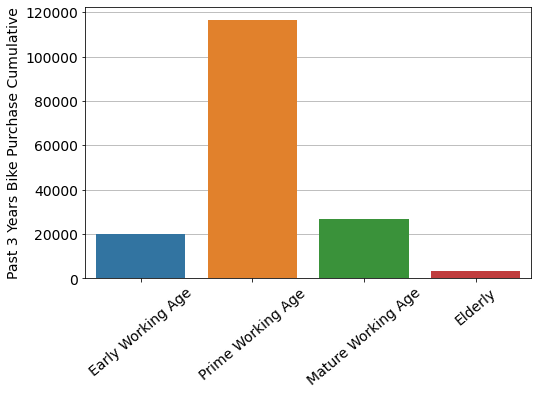

In [ ]:
def past_3_years_bike_purchase_based_age_range_distribution(df):
  subject_bike_purchase = ['past_3_years_bike_related_purchases']
  bike_purchase = df.groupby('age_range')[subject_bike_purchase].sum().rename_axis(None)
  bike_purchase = bike_purchase.rename(columns={'past_3_years_bike_related_purchases':'counts'},
                                       index={'18-24':'Early Working Age','25-54':'Prime Working Age',
                                              '55-64':'Mature Working Age','65+':'Elderly'})
  bike_purchase = bike_purchase.reset_index().rename(columns = {'index':'age range'})
  index = np.arange(len([subject_bike_purchase]))
  import seaborn as sns
  fig,ax = plt.subplots(figsize= (8,5))
  sns.barplot(x = 'age range', y = 'counts', data = bike_purchase, zorder =2)
  ax.grid(axis ='y')
  #ax.set_xticklabels = (fontsize = 15)
  #x_values = bike_purchase['counts'].T.tolist()
  #for i, v in enumerate(x_values):
   # plt.text(i-0.17,v+950,str(v), color = 'black')
  plt.xticks(fontsize = 14, rotation = 40)
  plt.yticks(fontsize = 14)
  plt.xlabel(None)
  plt.ylabel('Past 3 Years Bike Purchase Cumulative', fontsize = 14)
  return bike_purchase
aaa = past_3_years_bike_purchase_based_age_range_distribution(df)
aaa

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


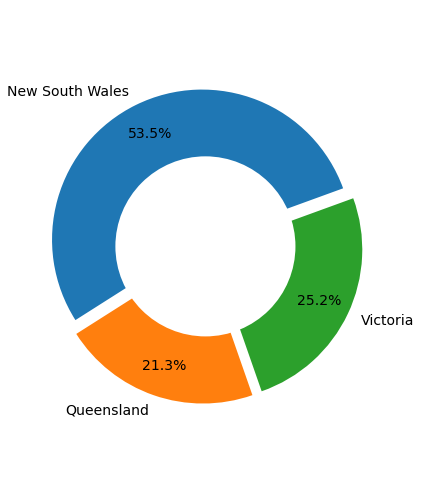

In [ ]:
def past_3_years_bike_purchase_based_states(x):
  subject = 'past_3_years_bike_related_purchases'
  bike_counts = x.groupby('state')[subject].sum()
  bike_counts = bike_counts.reset_index(name='counts')
  bike_counts['percentage'] = round((bike_counts['counts']/bike_counts['counts'].sum())*100,2)
  nsw = bike_counts.copy(deep=True)
  nsw['valid'] = nsw['state'].astype(str).str.match(r'NSW')
  nsw = nsw[nsw['valid']==True].percentage.values
  qld = bike_counts.copy(deep=True)
  qld['valid'] = qld['state'].astype(str).str.match(r'QLD')
  qld = qld[qld['valid']==True].percentage.values
  vic = bike_counts.copy(deep=True)
  vic['valid'] = vic['state'].astype(str).str.match(r'VIC')
  vic = vic[vic['valid']==True].percentage.values
  size = [nsw,qld,vic]
  label = ['New South Wales','Queensland','Victoria']

  #explsion
  explode = (0.05,0.05,0.05)
  textprops = dict(size=14, color="black")
  plt.figure(figsize=(6,7))
  plt.pie(size, labels=label, autopct='%1.1f%%', startangle=20, 
          pctdistance=0.79,explode = explode,  textprops=textprops)
  #draw circle
  centre_circle = plt.Circle((0,0),0.6,fc='white')
  fig = plt.gcf()
  fig.gca().add_artist(centre_circle)
  plt.axis('equal')  
  plt.tight_layout()
  #plt.xlabel('B')
  plt.show()
  past_3_years_based_state = bike_counts
  return past_3_years_based_state
ab = past_3_years_bike_purchase_based_states(df)
ab.to_excel('past_bike_related_purchase_based_on_states.xlsx')

  
 

-> Brand Interaction Based on Age

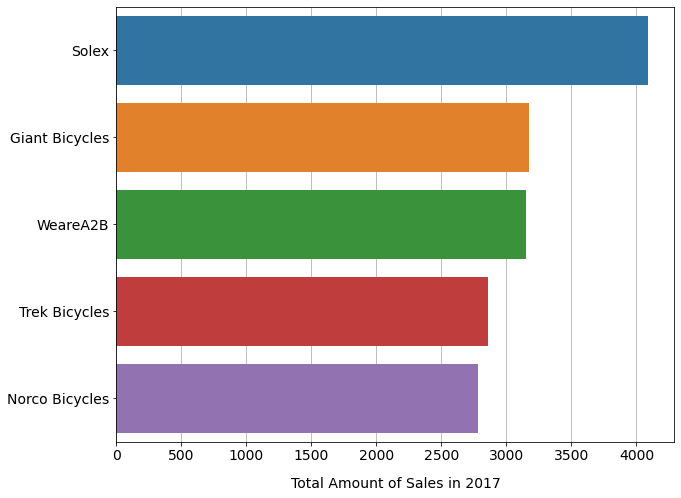

In [ ]:
def brand_sales_ratio(x):
  brand = ['Solex','Giant Bicycles','WeareA2B','Trek Bicycles', 'Norco Bicycles']
  data = []
  for i in brand:
    data.append(x[i].sum())
  data = np.transpose(pd.DataFrame(data))
  data.columns = brand
  data = data.T.reset_index().rename(columns = {'index':'brand',0:'counts'})
  import seaborn as sns
  fig,ax = plt.subplots(figsize = (10,8))
  sns.barplot(x = 'counts', y = 'brand',data = data, zorder = 2)
  plt.ylabel(None)
  plt.xlabel('Total Amount of Sales in 2017', labelpad = 14, fontsize = 14)
  plt.xticks(fontsize = 14)
  plt.yticks(fontsize = 14)
  plt.grid(axis = 'x')
  brand_sales_2017 = data
  return brand_sales_2017
soll = brand_sales_ratio(df)
soll.to_excel('Total_Brand_Sales_2017.xlsx')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


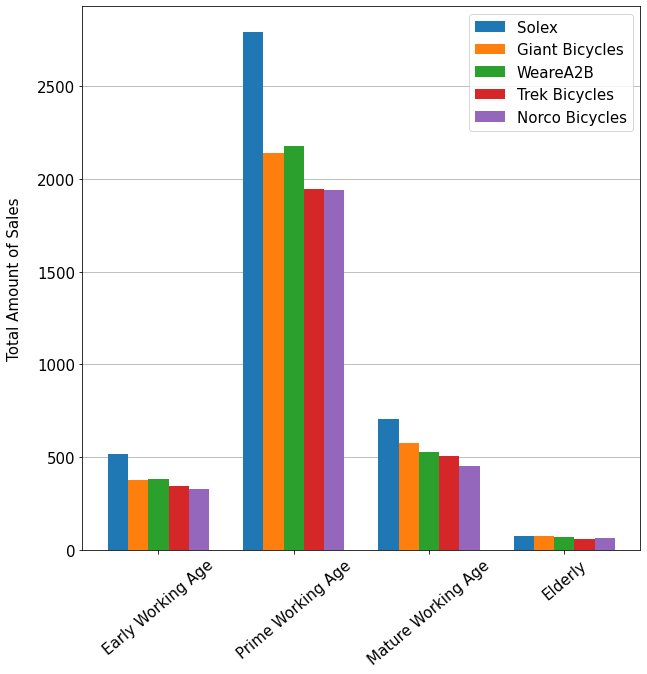

In [ ]:
def brand_based_age(x):
  subject = 'Solex','Giant Bicycles', 'WeareA2B','Trek Bicycles','Norco Bicycles'
  brand_counts = x.groupby('age_range')[subject].sum().rename(index={'18-24':'Early Working Age','25-54':'Prime Working Age','55-64':'Mature Working Age','65+':'Elderly'})
  #ewa = list(brand_counts['18-24'].T)
  #pwa = list(brand_counts['25-54'].T)
  #mwa = list(brand_counts['55-64'].T)
  #eld = list(brand_counts.T['65+'])
  sol = list(brand_counts['Solex'].T)
  gia = list(brand_counts['Giant Bicycles'].T)
  wea = list(brand_counts['WeareA2B'].T)
  tre = list(brand_counts['Trek Bicycles'].T)
  nor = list(brand_counts['Norco Bicycles'].T)

  bar_width = 0.15
  index = np.arange(len(brand_counts.index))
  plt.figure(figsize=(10,10))
  plt.bar(index,sol,width = bar_width,label = 'Solex',zorder = 2)
  plt.bar(index + bar_width, gia, width = bar_width, label = 'Giant Bicycles', zorder = 2)
  plt.bar(index + bar_width*2,wea,width=bar_width,label = 'WeareA2B', zorder =2)
  plt.bar(index + bar_width*3,tre, width = bar_width,label = 'Trek Bicycles', zorder = 2)
  plt.bar(index + bar_width*4,nor, width = bar_width,label = 'Norco Bicycles', zorder = 2)
  plt.xticks(index + bar_width*2, brand_counts.index, fontsize = 15, rotation = 40)
  plt.yticks(fontsize=15)
  plt.grid(axis = 'y')
  plt.ylabel('Total Amount of Sales', fontsize = 15, labelpad = 15)
  plt.legend(fontsize =15)
  brand_based_age = brand_counts
  return brand_based_age
brand = brand_based_age(df)
brand.to_excel('Brand_based_age_range.xlsx')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


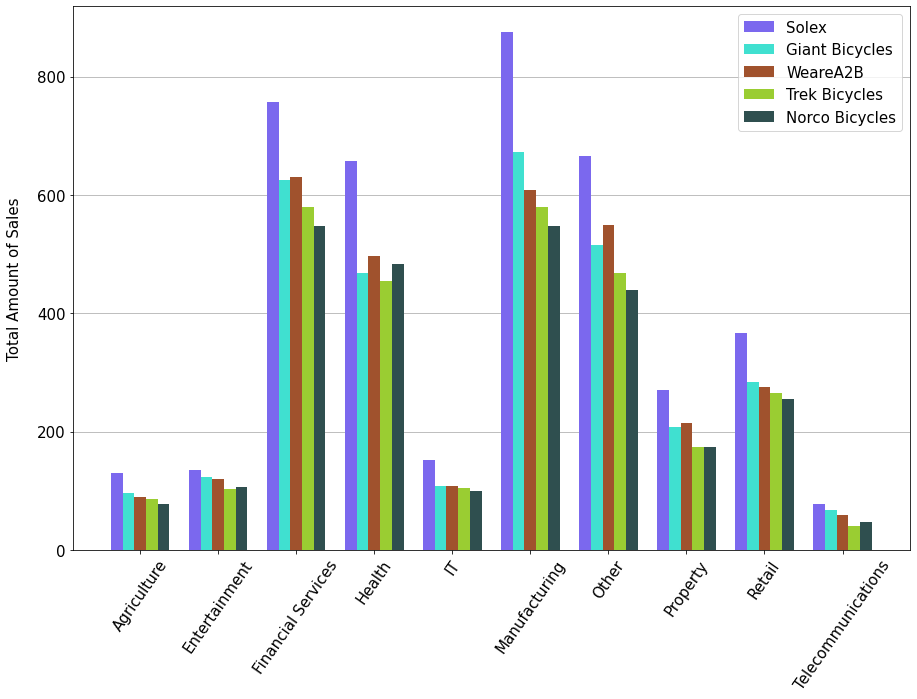

In [ ]:
def brand_based_job_industry(x):
  subject = 'Solex','Giant Bicycles','WeareA2B','Trek Bicycles','Norco Bicycles' 
  brand_counts = x.groupby('job_industry_category')[subject].sum()
  #arg = list(brand_counts.T['Argiculture'])
  #tel = list(brand_counts.T['Telecommunications'])
  #ent = list(brand_counts.T['Entertainment'])
  #it = list(brand_counts.T['IT'])
  #pro = list(brand_counts.T['Property'])
  #ret = list(brand_counts.T['Retail'])
  #hea = list(brand_counts.T['Health'])
  #oth = list(brand_counts.T['Other'])
  #fin = list(brand_counts.T['Financial Services'])
  #man = list(brand_counts.T['Manufacturing'])
  sol = list(brand_counts['Solex'].T)
  gia = list(brand_counts['Giant Bicycles'].T)
  wea = list(brand_counts['WeareA2B'].T)
  tre = list(brand_counts['Trek Bicycles'].T)
  nor = list(brand_counts['Norco Bicycles'].T)

  bar_width = 0.15
  index = np.arange(len(brand_counts.index))
  plt.figure(figsize=(15,10))
  plt.bar(index,sol,width = bar_width,label = 'Solex',zorder = 2,color ='mediumslateblue')
  plt.bar(index + bar_width, gia, width = bar_width, label = 'Giant Bicycles', zorder = 2,color='turquoise')
  plt.bar(index + bar_width*2,wea,width=bar_width,label = 'WeareA2B', zorder =2,color = 'sienna')
  plt.bar(index + bar_width*3,tre, width = bar_width,label = 'Trek Bicycles', zorder = 2, color= 'yellowgreen')
  plt.bar(index + bar_width*4,nor, width = bar_width,label = 'Norco Bicycles', zorder = 2,color ='darkslategray')
  plt.xticks(index + bar_width*2, brand_counts.index, fontsize = 15, rotation = 55)
  plt.yticks(fontsize=15)
  plt.grid(axis = 'y')
  plt.ylabel('Total Amount of Sales', fontsize = 15, labelpad = 15)
  plt.legend(fontsize =15)
  brand_based_industry_job = brand_counts
  return brand_based_industry_job
brand_based_job= brand_based_job_industry(df)
brand_based_job.to_excel('brand_based_industry.xlsx')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


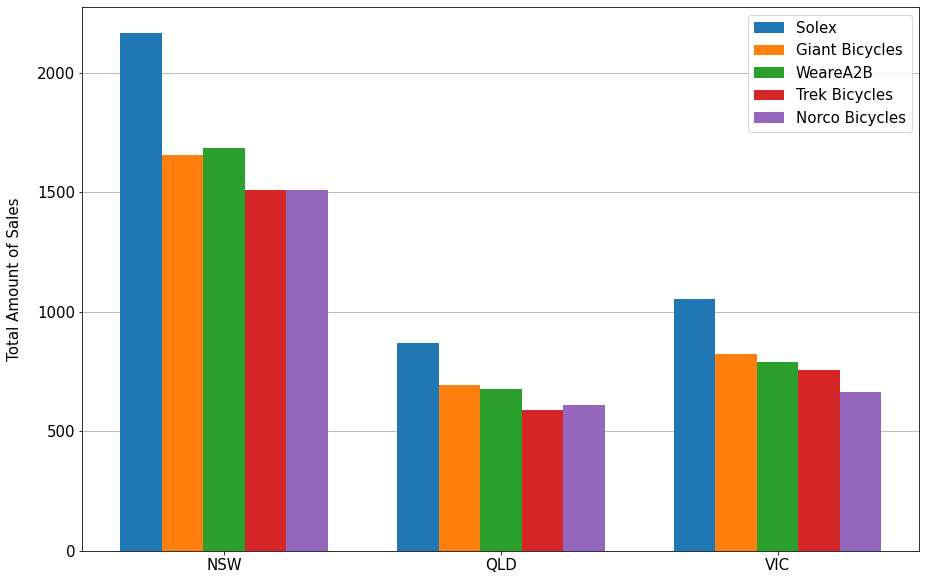

In [ ]:
# brand based on state
def brand_based_state(x):
  subject = 'Solex','Giant Bicycles','WeareA2B','Trek Bicycles','Norco Bicycles' 
  brand_counts = x.groupby('state')[subject].sum()
  sol = list(brand_counts['Solex'].T)
  gia = list(brand_counts['Giant Bicycles'].T)
  wea = list(brand_counts['WeareA2B'].T)
  tre = list(brand_counts['Trek Bicycles'].T)
  nor = list(brand_counts['Norco Bicycles'].T)
  bar_width = 0.15
  index = np.arange(len(brand_counts.index))
  plt.figure(figsize=(15,10))
  plt.bar(index,sol,width = bar_width,label = 'Solex',zorder = 2)
  plt.bar(index + bar_width, gia, width = bar_width, label = 'Giant Bicycles', zorder = 2)
  plt.bar(index + bar_width*2,wea,width=bar_width,label = 'WeareA2B', zorder =2)
  plt.bar(index + bar_width*3,tre, width = bar_width,label = 'Trek Bicycles', zorder = 2)
  plt.bar(index + bar_width*4,nor, width = bar_width,label = 'Norco Bicycles', zorder = 2)
  plt.xticks(index + bar_width*2, brand_counts.index, fontsize = 15)
  plt.yticks(fontsize=15)
  plt.grid(axis = 'y')
  plt.ylabel('Total Amount of Sales', fontsize = 15, labelpad = 15)
  plt.legend(fontsize =15)
  brand_based_state = brand_counts
  return brand_based_state
brand_based_state = brand_based_state(df)
brand_based_state.to_excel('brand_based_state.xlsx')


**Data Preprocessing New Customer Data**

---



In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           983 non-null    object        
 1   last_name                            954 non-null    object        
 2   gender                               983 non-null    object        
 3   past_3_years_bike_related_purchases  983 non-null    object        
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            983 non-null    object        
 6   job_industry_category                983 non-null    object        
 7   wealth_segment                       983 non-null    object        
 8   deceased_indicator                   983 non-null    object        
 9   owns_car                             983 non-null    object        
 10  tenure        

In [ ]:
def new_customer_data(x):
  x = df4.copy(deep=True)
  col_mis = ['DOB','job_title','job_industry_category']
  for col in col_mis:
    if (col == 'job_title'):
      x[col].fillna(value = 'Other',inplace = True)
    elif (col == 'job_industry_category'):
      x[col].fillna(value = 'Other', inplace = True)
    else:
      x.dropna(subset=['DOB'], inplace = True)
  now = pd.Timestamp('now')
  import datetime
  lis = []
  x["DOB"] = pd.to_datetime(x["DOB"]).dt.strftime('%Y-%m-%d %H:%M:%S')
  now = pd.to_datetime('today')
  x['DOB'] = pd.to_datetime(x['DOB'])
  x['age'] = (now - x['DOB']).astype('<m8[Y]')
  x['name'] = x[x.columns[0:2]].astype(str).apply(df1_name,axis = 1)
  now = pd.Timestamp('now')
  x['age'] = (now - x['DOB']).astype('<m8[Y]') # 3
  bins = [18, 25, 55, 65, 100]
  labels = ['18-24', '25-54', '55-64', '65+']
  x['age_range'] = pd.cut(x.age, bins, labels = labels,include_lowest = True)
  x = x.reindex(columns= ['name', 'gender', 'DOB', 'age', 'age_range', 'address', 'postcode',
       'state', 'country', 'deceased_indicator', 'job_title',
       'job_industry_category', 'tenure',
       'past_3_years_bike_related_purchases', 'owns_car', 'property_valuation',
       'wealth_segment'])#.drop(columns=['first_name','last_name','customer_id','default'])
  return x
df4_new = new_customer_data(df4)
df4_new.head()

,name,gender,DOB,age,age_range,address,postcode,state,country,deceased_indicator,job_title,job_industry_category,tenure,past_3_years_bike_related_purchases,owns_car,property_valuation,wealth_segment
0,Chickie Brister,Male,1957-07-12,63.0,55-64,45 Shopko Center,4500,QLD,Australia,N,General Manager,Manufacturing,14,86,Yes,6,Mass Customer
1,Morly Genery,Male,1970-03-22,50.0,25-54,14 Mccormick Park,2113,NSW,Australia,N,Structural Engineer,Property,16,69,No,11,Mass Customer
2,Ardelis Forrester,Female,1974-08-28,46.0,25-54,5 Colorado Crossing,3505,VIC,Australia,N,Senior Cost Accountant,Financial Services,10,10,No,5,Affluent Customer
3,Lucine Stutt,Female,1979-01-28,41.0,25-54,207 Annamark Plaza,4814,QLD,Australia,N,Account Representative III,Manufacturing,5,64,Yes,1,Affluent Customer
4,Melinda Hadlee,Female,1965-09-21,55.0,25-54,115 Montana Place,2093,NSW,Australia,N,Financial Analyst,Financial Services,19,34,No,9,Affluent Customer


In [ ]:
df4_new.to_excel('New Customer Data Raw.xlsx')

In [ ]:
df.head()
df.to_excel('Existing Customer Data Raw.xlsx')

**Predictive Analytics**

--> Numbering The Categorical Value (Existing Data Customer)

In [ ]:
def prepare_existing_data(df):
  feature_2_drop = ['customer_id','Solex',
                      'Giant Bicycles','WeareA2B',
                      'OHM Cycles','Trek Bicycles',
                      'Norco Bicycles',
                      'frequency','monetary_value','recency',
                      'R_Quartile','F_Quartile',
                      'M_Quartile','RFM_Class','RFM_Score','Score']
  df = df.drop(feature_2_drop, axis = 1)
  return df
def combine_existing_new(existing,new):
  df = pd.concat([existing,new],ignore_index=True)
  #df = df.drop(['Score'], axis = 1)
  return df

existing = prepare_existing_data(df)
combined_data = combine_existing_new(existing,df4_new)
combined_data.to_excel('Combined Existing New.xlsx')
combined_data.tail()

,name,gender,DOB,age,age_range,address,postcode,state,country,deceased_indicator,job_title,job_industry_category,tenure,past_3_years_bike_related_purchases,owns_car,property_valuation,wealth_segment
4388,Ferdinand Romanetti,Male,1959-10-07 00:00:00,61.0,55-64,2 Sloan Way,2200,NSW,Australia,N,Paralegal,Financial Services,9,60,No,7,Affluent Customer
4389,Burk Wortley,Male,2001-10-17 00:00:00,19.0,18-24,04 Union Crossing,2196,NSW,Australia,N,Senior Sales Associate,Health,6,22,No,10,Mass Customer
4390,Melloney Temby,Female,1954-10-05 00:00:00,66.0,65+,33475 Fair Oaks Junction,4702,QLD,Australia,N,Budget/Accounting Analyst IV,Financial Services,15,17,Yes,2,Affluent Customer
4391,Dickie Cubbini,Male,1952-12-17 00:00:00,68.0,65+,57666 Victoria Way,4215,QLD,Australia,N,Financial Advisor,Financial Services,19,30,Yes,2,Mass Customer
4392,Sylas Duffill,Male,1955-10-02 00:00:00,65.0,55-64,21875 Grover Drive,2010,NSW,Australia,N,Staff Accountant IV,Property,14,56,Yes,9,Mass Customer


In [ ]:
# preform one hot encoding
def encode_and_scalling_input(x):
  feature_2_drop = ['name','DOB','age_range','address','postcode','country',
                    'deceased_indicator','job_title','job_industry_category']      
  x = x.drop(feature_2_drop,axis = 1)
    # OH Encode
  #x = pd.get_dummies(x,columns=['state','wealth_segment'])
    # Label Encoder
  from sklearn.preprocessing import LabelEncoder
  feature_2_encode = ['gender','owns_car','state','wealth_segment']
  l3 = LabelEncoder()
  label = []
  for i in feature_2_encode:
    label.append(l3.fit_transform(x[i]))
    data = pd.DataFrame(np.transpose(label))
  data.columns = feature_2_encode 
  x[feature_2_encode] = data[feature_2_encode]
    # Scalling
  feature_2_scale = ['tenure','past_3_years_bike_related_purchases','property_valuation','age']
  #from sklearn.preprocessing import StandardScaler
  #standardScaler = StandardScaler()
  #x[feature_2_scale] = standardScaler.fit_transform(x[feature_2_scale])
  return x
combined_data_new = encode_and_scalling_input(combined_data)
combined_data_new.info()
combined_data_new.to_excel('Combined Data New.xlsx')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4393 entries, 0 to 4392
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               4393 non-null   int64  
 1   age                                  4393 non-null   float64
 2   state                                4393 non-null   int64  
 3   tenure                               4393 non-null   object 
 4   past_3_years_bike_related_purchases  4393 non-null   object 
 5   owns_car                             4393 non-null   int64  
 6   property_valuation                   4393 non-null   object 
 7   wealth_segment                       4393 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 274.7+ KB


In [ ]:
combined_data_new.head()

,gender,age,state,tenure,past_3_years_bike_related_purchases,owns_car,property_valuation,wealth_segment
0,0,67.0,0,11,93,1,10,2
1,1,40.0,0,16,81,1,10,2
2,1,59.0,1,7,33,0,9,2
3,0,43.0,0,8,56,1,4,0
4,1,54.0,2,13,35,1,9,1


In [ ]:
def split_existing_new_data(x):
  existing_encoded_input = x.loc[0:3409]
  new_encoded_input = x.loc[3410:]
  return existing_encoded_input,new_encoded_input 
existing_encoded_input,new_encoded_input = split_existing_new_data(combined_data_new) 

In [ ]:
def label_encoder_output(x):
  from sklearn.preprocessing import LabelEncoder
  #x_new = x.copy(deep = True)
  feature_2_encode = ['Score']
  l3 = LabelEncoder()
  label = []
  for i in feature_2_encode:
    label.append(l3.fit_transform(x[i]))
    output_existing = pd.DataFrame(np.transpose(label))
  output_existing.columns = feature_2_encode 
  return output_existing
existing_encoded_output = label_encoder_output(df)
existing_encoded_output.head()

,Score
0,2
1,3
2,3
3,0
4,4


In [ ]:
def existing_data(input,output):
  x = input
  y = output
  df = pd.merge(x,y, left_index=True, right_index=True, how='inner')
  return df
existing_data = existing_data(existing_encoded_input,existing_encoded_output)
existing_data.head()
existing_data.to_excel('Existing_Customer_Dataset_Final.xlsx')

new_customer_data = new_encoded_input
new_customer_data.to_excel('New_Customer_Dataset_Final.xlsx')

In [ ]:
existing_data.head()

,gender,age,state,tenure,past_3_years_bike_related_purchases,owns_car,property_valuation,wealth_segment,Score
0,0,67.0,0,11,93,1,10,2,2
1,1,40.0,0,16,81,1,10,2,3
2,1,59.0,1,7,33,0,9,2,3
3,0,43.0,0,8,56,1,4,0,0
4,1,54.0,2,13,35,1,9,1,4


In [ ]:
existing_data.corr()

,gender,age,state,owns_car,wealth_segment,Score
gender,1.000000,-0.010710,0.000928,-0.004390,-0.029048,0.012145
age,-0.010710,1.000000,0.009534,-0.000880,0.004696,-0.006550
state,0.000928,0.009534,1.000000,-0.016187,0.003275,0.005368
owns_car,-0.004390,-0.000880,-0.016187,1.000000,-0.029379,-0.006667
wealth_segment,-0.029048,0.004696,0.003275,-0.029379,1.000000,0.000569
Score,0.012145,-0.006550,0.005368,-0.006667,0.000569,1.000000


**Applying PCA**

In [ ]:
# split the input and output data
def input_output_split():
  x = existing_data.loc[:,'gender':'wealth_segment'].values
  y = existing_data.loc[:,'Score'].values
  return x,y
x,y = input_output_split()
print('Observed feature')
print(x)
print('\nOutput Feature')
print(y)

Observed feature
[[0 67.0 0 ... 1 10 2]
 [1 40.0 0 ... 1 10 2]
 [1 59.0 1 ... 0 9 2]
 ...
 [0 25.0 2 ... 0 4 2]
 [1 41.0 1 ... 1 9 2]
 [0 53.0 0 ... 0 10 0]]

Output Feature
[2 3 3 ... 4 0 1]


In [ ]:
# Standardize the data
def Standardize_data(x):
  from sklearn.preprocessing import StandardScaler
  x_std = StandardScaler().fit_transform(x)
  return x_std
x_std = Standardize_data(x)
#df_x_std = np.round(pd.DataFrame(x_std, columns = df.columns[0:10]),3)
df_x_std = pd.DataFrame(x_std, columns = existing_data.columns[0:8])
#print(df_x_std.head())
df_x_std.head()
#df_x_std.to_excel('input_standardize.xlsx')

,gender,age,state,tenure,past_3_years_bike_related_purchases,owns_car,property_valuation,wealth_segment
0,-0.969953,1.922736,-0.853829,0.056297,1.536663,0.990079,0.880184,0.905363
1,1.030978,-0.223870,-0.853829,0.937707,1.117863,0.990079,0.880184,0.905363
2,1.030978,1.286705,0.335532,-0.648832,-0.557335,-1.010021,0.525782,0.905363
3,-0.969953,0.014642,-0.853829,-0.472550,0.245364,0.990079,-1.246226,-1.519844
4,1.030978,0.889185,1.524894,0.408861,-0.487535,0.990079,0.525782,-0.307240


In [ ]:
def cov_matrix(x):
  import numpy as np
  mean_vector = np.mean(x, axis = 0)
  cov_matrix = (x-mean_vector).T.dot(x-mean_vector)/(x.shape[0]-1)
  return cov_matrix,mean_vector
cov_matrix,mean_vector = cov_matrix(x_std)
df_cov_matrix = np.round(pd.DataFrame(cov_matrix),3)
df_mean_vector = np.round(pd.DataFrame(mean_vector))
#print('Covariance Matrix \n{}'.format(df_cov_matrix))
df_cov_matrix
#df_cov_matrix.to_excel("cov_matrix_pca.xlsx")
#df_mean_vector.to_excel('mean_vector.xlsx')

,0,1,2,3,4,5,6,7
0,1.000,-0.011,0.001,0.002,0.028,-0.004,-0.007,-0.029
1,-0.011,1.000,0.010,0.436,-0.032,-0.001,0.022,0.005
2,0.001,0.010,1.000,0.002,-0.001,-0.016,-0.229,0.003
3,0.002,0.436,0.002,1.000,-0.013,-0.008,-0.014,0.011
4,0.028,-0.032,-0.001,-0.013,1.000,-0.000,0.010,0.018
5,-0.004,-0.001,-0.016,-0.008,-0.000,1.000,0.046,-0.029
6,-0.007,0.022,-0.229,-0.014,0.010,0.046,1.000,-0.016
7,-0.029,0.005,0.003,0.011,0.018,-0.029,-0.016,1.000


In [ ]:
axa = (x_std-mean_vector)
axa

array([[-0.96995268,  1.92273599, -0.85382891, ...,  0.99007854,
         0.88018382,  0.90536304],
       [ 1.03097813, -0.22387   , -0.85382891, ...,  0.99007854,
         0.88018382,  0.90536304],
       [ 1.03097813,  1.28670458,  0.33553244, ..., -1.01002088,
         0.52578226,  0.90536304],
       ...,
       [-0.96995268, -1.41642888,  1.52489379, ..., -1.01002088,
        -1.24622556,  0.90536304],
       [ 1.03097813, -0.14436607,  0.33553244, ...,  0.99007854,
         0.52578226,  0.90536304],
       [-0.96995268,  0.80968103, -0.85382891, ..., -1.01002088,
         0.88018382, -1.51984354]])

In [ ]:
def eigen_decomposition(x):
  eig_vals, eig_vecs = np.linalg.eig(x)
  return eig_vals, eig_vecs
eig_vals, eig_vecs = eigen_decomposition(df_cov_matrix.values)
print('Eigenvectors \n {}'. format(eig_vecs))
print('\nEigenvalues \n {}'.format(eig_vals))


Eigenvectors 
 [[ 1.79724350e-02  2.05397694e-02  2.90088373e-02 -1.65999726e-02
   5.48227441e-01  3.13716187e-01  5.20778271e-01 -5.72675176e-01]
 [ 7.04260002e-01 -7.05432550e-01  6.08593281e-02  3.16929656e-02
  -2.27693106e-02 -2.12856086e-02  1.18478984e-02 -2.37186316e-02]
 [-5.89575562e-02 -2.13643885e-02  6.93926152e-01 -6.83139468e-01
  -1.47081709e-02 -1.67200824e-01 -7.30538023e-02 -1.19771568e-01]
 [-7.01018800e-01 -7.03757758e-01 -8.56322746e-02  7.95471304e-05
  -2.24660490e-02 -2.42145360e-02  6.38050624e-02 -2.83304693e-02]
 [ 3.10255955e-02  7.26276707e-02 -3.05121095e-02  2.03656330e-02
  -4.68840997e-01 -4.80040538e-01  7.35129417e-01 -4.18428981e-02]
 [-3.49036487e-03  1.69371556e-02 -9.02860367e-02  1.89593957e-01
   3.45471954e-01 -7.68018891e-01 -3.13613379e-01 -3.84767819e-01]
 [-8.81792121e-02  2.26289574e-03  7.04345087e-01  7.00122274e-01
  -1.67389537e-02  4.34018519e-02  3.39222943e-02  5.12978569e-02]
 [ 6.41455007e-03 -2.53939047e-02  3.74657180e-02 -7.4

In [ ]:
def sort_eigen(eig_val,eig_vec):
  # Make a list of (eigenvalue, eigenvector) tuples
  eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]
  # Sort the (eigenvalue, eigenvector) tuples from high to low
  eig_pairs.sort(key=lambda x: x[0], reverse=True)
  return eig_pairs
eig_pairs = sort_eigen(eig_vals,eig_vecs)
print('\nEigenvalues in descending order:')
for i in eig_pairs:
  print(i[0])
print('\nEigenvector in descending order:')
for i in eig_pairs:
  print(i[1])


Eigenvalues in descending order:
1.4390159939760179
1.2390493438375139
1.0357849322349404
1.0256485856302326
0.9867932579098625
0.9424115823386479
0.7705214006879865
0.5607749033847966

Eigenvector in descending order:
[ 0.02053977 -0.70543255 -0.02136439 -0.70375776  0.07262767  0.01693716
  0.0022629  -0.0253939 ]
[-1.65999726e-02  3.16929656e-02 -6.83139468e-01  7.95471304e-05
  2.03656330e-02  1.89593957e-01  7.00122274e-01 -7.42201540e-02]
[-0.57267518 -0.02371863 -0.11977157 -0.02833047 -0.0418429  -0.38476782
  0.05129786  0.70986207]
[ 0.52077827  0.0118479  -0.0730538   0.06380506  0.73512942 -0.31361338
  0.03392229  0.28164222]
[ 0.31371619 -0.02128561 -0.16720082 -0.02421454 -0.48004054 -0.76801889
  0.04340185 -0.22452386]
[ 0.54822744 -0.02276931 -0.01470817 -0.02246605 -0.468841    0.34547195
 -0.01673895  0.59896931]
[ 0.02900884  0.06085933  0.69392615 -0.08563227 -0.03051211 -0.09028604
  0.70434509  0.03746572]
[ 0.01797244  0.70426    -0.05895756 -0.7010188   0.031

In [ ]:
def pca_loadings(eigpairs,input):
  data =  []
  for i in eigpairs:
    data.append(i[1])
  a = pd.DataFrame(data).T
  a.columns = [''.join(['PC',f'{i+1}']) for i in range (a.shape[1])] 
  a.index = input.drop('RFM_Score',axis = 1).columns
  return a
loadings = np.round(pca_loadings(eig_pairs,existing_data),3)
#loadings.to_excel('loading_factor.xlsx')
loadings

KeyError: ignored

In [ ]:
def pca_variance(eigpairs):
  list_var = []
  for i in eigpairs:
    list_var.append(i[0])
    eig_val = pd.DataFrame(list_var).T
    eig_val.columns = [''.join(['PC',f'{i+1}']) for i in range (eig_val.shape[1])]
  list_var_ratio = []
  for i in eig_val.values:
    list_var_ratio.append((i/np.sum(eig_val.values))*100)     
    eig_val_ratio = pd.DataFrame(list_var_ratio)  
    eig_val_ratio.columns = [''.join(['PC',f'{i+1}']) for i in range (eig_val_ratio.shape[1])]
  return np.round(eig_val,3),eig_val_ratio 
sorted_variance,sorted_exp_variance= pca_variance(eig_pairs)
sorted_variance.to_excel('sorted_variance.xlsx')
sorted_exp_variance.to_excel('sorted_exp_variance.xlsx')

In [ ]:
def biplots(x,y):
    #x = variance
    #y = variance_ratio
    subject = y.columns
    x = x.values.T
    y = y.values
    cumulated_var_ratio = []
    #series = pd.Series(y)
    cumsum = y.cumsum()
    cumulated_var_ratio.append(cumsum)
    cumulated_var_ratio = cumulated_var_ratio[0]
    index = np.arange(len(x))
    #indexy = 
    fig,ax = plt.subplots(figsize=(10,7))
    ax.plot(x,color='black', marker='+', linestyle='dashed',linewidth=1, markersize=9, markerfacecolor = 'red')
    ax2 = ax.twinx()
    ax2.plot(cumulated_var_ratio,color='black', marker='o', linestyle='dashed',linewidth=1, markersize=7, markerfacecolor = 'blue')
    ax2.set_ylim(0,102)
    plt.xticks(index,subject,fontsize = 15)
    #ax.set_xticks(index,subject,labelsize = 15)
    ax.tick_params(labelsize=15)
    plt.yticks(fontsize=15)
    ax.set_ylabel('Eigenvalue', fontsize = 15, labelpad = 15)
    ax2.set_ylabel('Cumulative Percentage', fontsize = 15, labelpad = 15)
    plt.grid()
    plt.show()
    return cumulated_var_ratio
biplots(sorted_variance,sorted_exp_variance)

In [ ]:
def contribution(x):
  #for i in x.index:
  c = np.abs(x.drop(x.columns[6:8],axis = 1))
  c = c.sum(axis = 1)  
  # return c.append(i)
  contribution = pd.DataFrame(c).reset_index().rename(columns={'index':'Variable',0:'Contribution'})
  contribution_ratio = []
  for i in contribution['Contribution']:
    contribution_ratio.append((i/np.sum(contribution['Contribution'].values))*100)
  contribution_ratio = pd.DataFrame(contribution_ratio).reset_index().rename(columns={'index':'Variable',0:'Contribution Ratio'})
  contribution_ratio['Variable'] = contribution['Variable'].values
  contribution = contribution.sort_values(by = 'Contribution', ascending=False)
  contribution_ratio = contribution_ratio.sort_values(by = 'Contribution Ratio', ascending=False)
  return contribution,contribution_ratio 
contribution,contribution_ratio = contribution(loadings)
#contribution_ratio.to_excel('contribution_ratio.xlsx')
contribution_ratio

In [ ]:
xxx = 1/8
xxx

In [ ]:
existing_data.head()

**Predictive Modelling**

In [ ]:
# Create Feature variabel X and Target variabel y
def split_existing_data(input):             
  x = input.drop(['tenure','state','property_valuation','RFM_Score','gender','owns_car'], axis = 1)
  y = input['RFM_Score']
  from sklearn.model_selection import train_test_split
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size  =0.3, random_state = 50)
  return x_train, x_test, y_train, y_test
# Split data 
x_train, x_test, y_train, y_test = split_existing_data(existing_data) 

In [ ]:
# Machine learning Classification model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [ ]:
# fit the logistic regression model
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

#Predictive Accuracy
pred = logmodel.predict(x_test)
# find Accuracy using _score model
logmodel_accuracy = round(metrics.accuracy_score(y_test,pred)* 100,2)
logmodel_accuracy

In [ ]:
svcmodel = SVC()
svcmodel.fit(x_train,y_train)
svc_pred = svcmodel.predict(x_test)
svc_accuracy = round(metrics.accuracy_score(y_test,svc_pred)*100,2)
svc_accuracy

In [ ]:
test_pred = pd.DataFrame(svc_pred).reset_index().drop(['index'], axis = 1)
test_y = pd.DataFrame(y_test).reset_index().drop(['index'],axis = 1)


In [ ]:
rfmodel = RandomForestClassifier(criterion = 'entropy')
rfmodel.fit(x_train,y_train)
rfpred = rfmodel.predict(x_test)
rf_accuracy = round(metrics.accuracy_score(y_test,rfpred)*100,2)
rf_accuracy

----------------------------------------------------------------------------------------**Break**